# Предсказание стоимости брильянтов

Повторим брильянты любым алгоритмом из scikit-learn на другом датасете, кроме нейросетей. Датасет больше и новее. Остальные библиотеки ML (например, xgboost, tf или pytorch) под полным запретом.


Не забываем про бининг, энкодеры и трансформеры. Принимается только решение через контейнер. 
Название итогового контейнера **pipeline_best**.

Мерить буду по MSE, поэтому важно понимать, что выбросы могут сильно повредить.
Напоминаю, что выбрасывать данные из тестового набора запрещается!!!


In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lars
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from IPython.display import Image
import category_encoders as ce
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import PredictionErrorDisplay

#import warnings
#warnings.filterwarnings("ignore")


### Область работы 2 (поиск  модели .... )

In [3]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВАЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = ... # содержит только имя файла, без имен папок !!!

In [4]:
path_train = 'train.csv'
df =pd.read_csv(path_train)

df

carat        cut color clarity  depth  table     x     y     z  price
0        1.01      Ideal     I     SI2   62.1   56.0  6.39  6.41  3.98   4078
1        1.08      Ideal     H     VS2   62.7   55.0  6.53  6.59  4.09   5851
2        2.02    Premium     I     VS2   59.8   60.0  8.20  8.28  4.92  16383
3        0.32  Very Good     G     SI1   63.0   56.0  4.33  4.36  2.74    477
4        0.74       Good     E     SI2   63.4   64.0  5.76  5.71  3.63   2401
...       ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
145174   0.50  Very Good     E     SI1   60.2   61.0  5.11  5.15  3.09   1410
145175   1.91  Very Good     F     SI1   62.3   62.0  7.85  7.79  4.87  15064
145176   1.22    Premium     G     VS2   62.8   58.0  6.82  6.74  4.26   7209
145177   0.31  Very Good     G    VVS1   61.1   56.0  4.37  4.40  2.67    816
145178   0.31  Very Good     G     SI2   61.8   59.0  4.34  4.38  2.70    408

[145179 rows x 10 columns]

In [5]:
df.describe()

carat          depth          table              x  \
count  145179.000000  145179.000000  145179.000000  145179.000000   
mean        0.791300      61.820854      57.229656       5.716450   
std         0.463331       1.082079       1.920026       1.110629   
min         0.200000      52.100000      49.000000       0.000000   
25%         0.400000      61.300000      56.000000       4.700000   
50%         0.700000      61.900000      57.000000       5.710000   
75%         1.030000      62.400000      58.000000       6.510000   
max         3.500000      71.600000      70.000000       9.650000   

                   y              z          price  
count  145179.000000  145179.000000  145179.000000  
mean        5.721229       3.535055    3972.751996  
std         1.103516       0.690620    4036.300085  
min         0.000000       0.000000     326.000000  
25%         4.710000       2.900000     948.000000  
50%         5.720000       3.530000    2409.000000  
75%         6.510000       4.030000    5408.000000  
max        10.010000      31.300000   18818.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145179 entries, 0 to 145178
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    145179 non-null  float64
 1   cut      145179 non-null  object 
 2   color    145179 non-null  object 
 3   clarity  145179 non-null  object 
 4   depth    145179 non-null  float64
 5   table    145179 non-null  float64
 6   x        145179 non-null  float64
 7   y        145179 non-null  float64
 8   z        145179 non-null  float64
 9   price    145179 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 11.1+ MB


In [7]:
# Проверяем данные на количество дублей
print(f'Количество дублей: {df.duplicated().sum()}')

Количество дублей: 0


In [8]:
# Проверяем нулевые значения для x
df.x[df.x==0].count()

2

In [9]:
# Проверяем нулевые значения для y
df.y[df.y==0].count()

1

In [10]:
# Проверяем нулевые значения для z
df.z[df.z==0].count()

6

In [11]:
# отбор всех сторок с нулевым. значением в любом месте колонки
df[df.eq(0).any(axis=1)]

carat        cut color clarity  depth  table     x     y    z  price
28099    2.17    Premium     H     SI2   60.3   57.0  8.42  8.36  0.0  15923
44199    0.71  Very Good     F     SI2   62.0   60.0  0.00  6.71  0.0   2130
81538    2.20    Premium     I     SI2   60.1   60.0  8.45  8.41  0.0  11221
95099    0.71       Good     F     SI1   64.1   60.0  0.00  0.00  0.0   2130
110571   2.18    Premium     H     SI2   59.4   60.0  8.46  8.41  0.0  15842
127686   2.18    Premium     H     SI2   60.8   59.0  8.42  8.38  0.0  13938

Построим график цены от карата, при этом камни отфильтруем так, чтобы они были одинакового качества, огранки и цвета

['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']


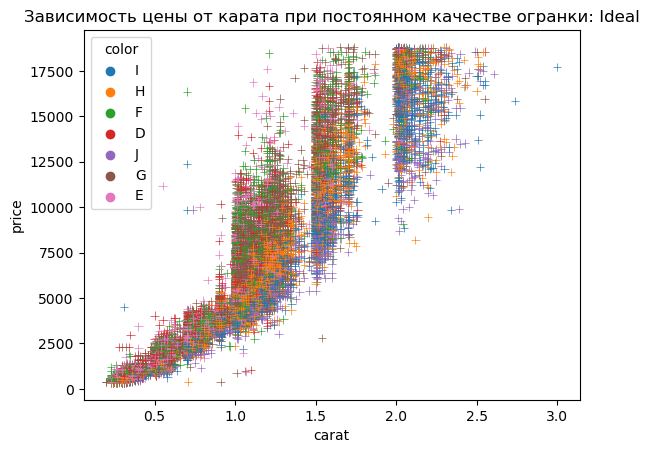

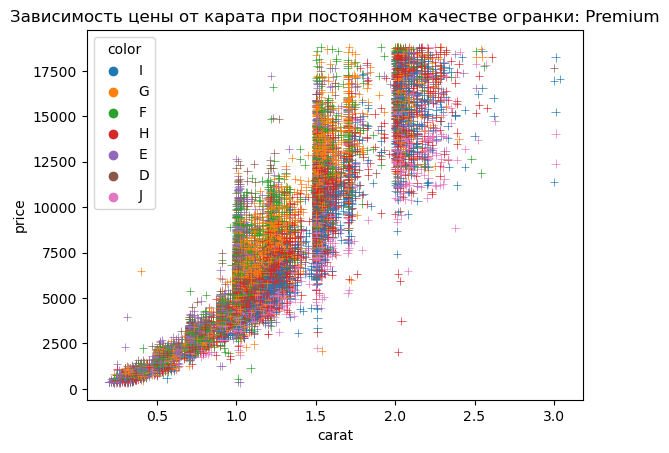

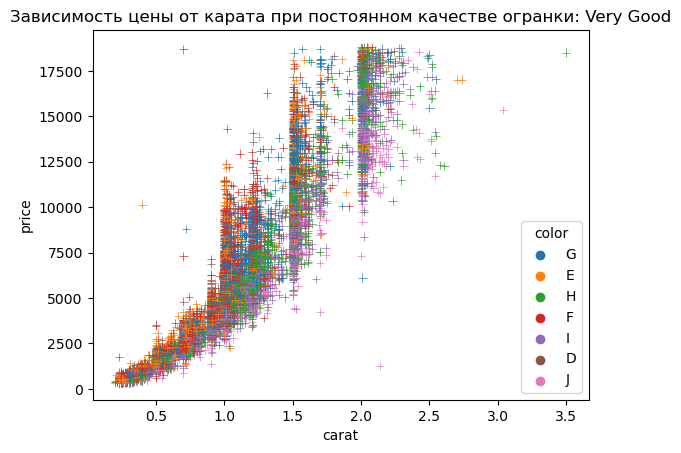

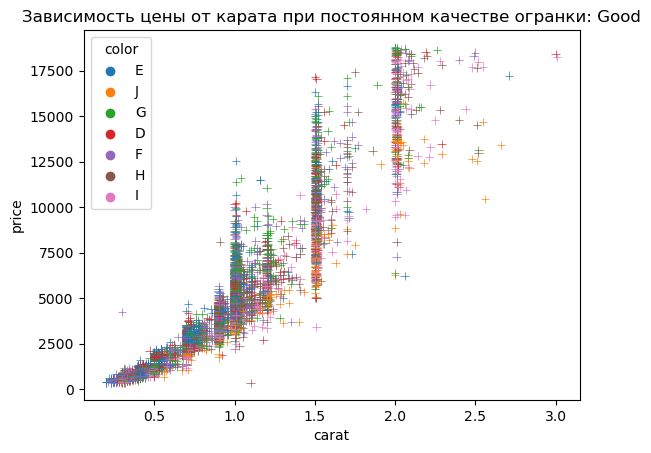

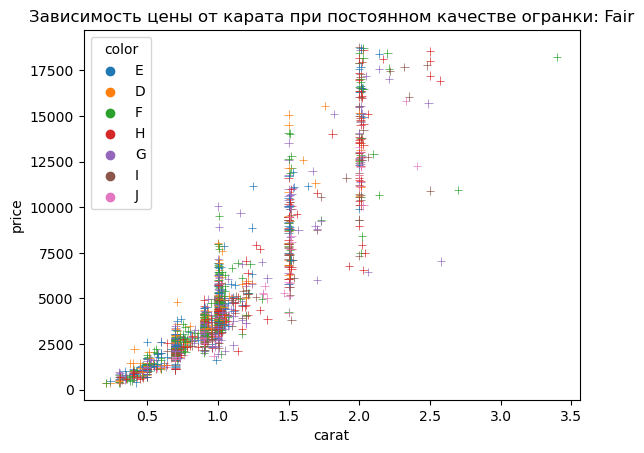

['I', 'H', 'G', 'E', 'F', 'D', 'J']


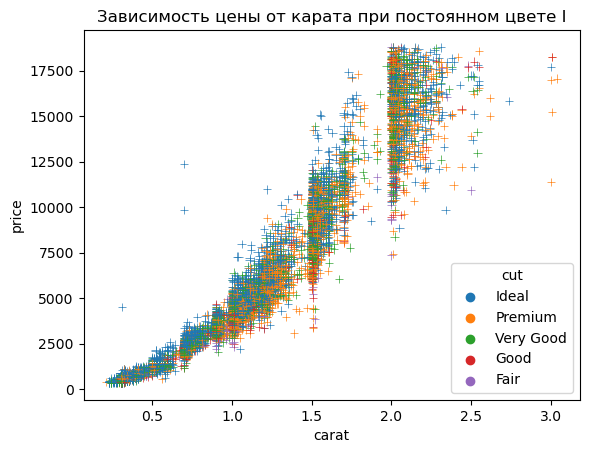

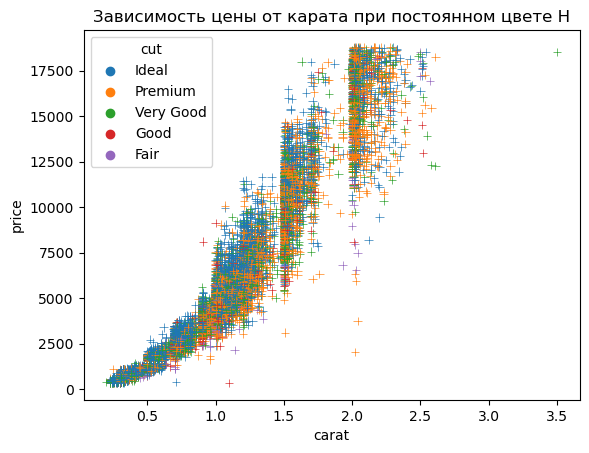

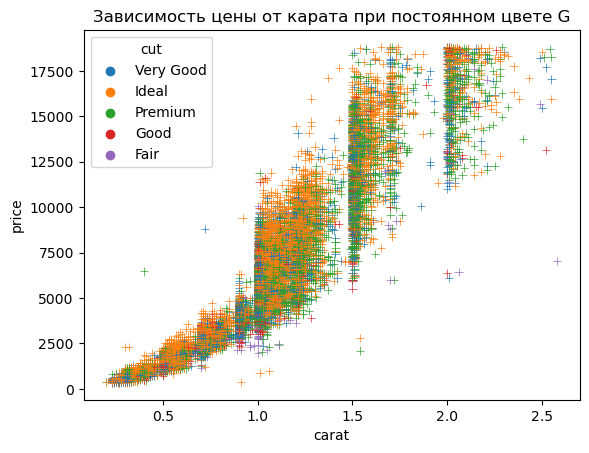

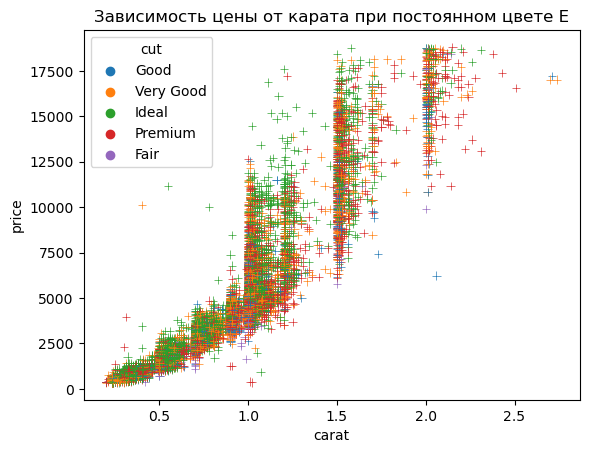

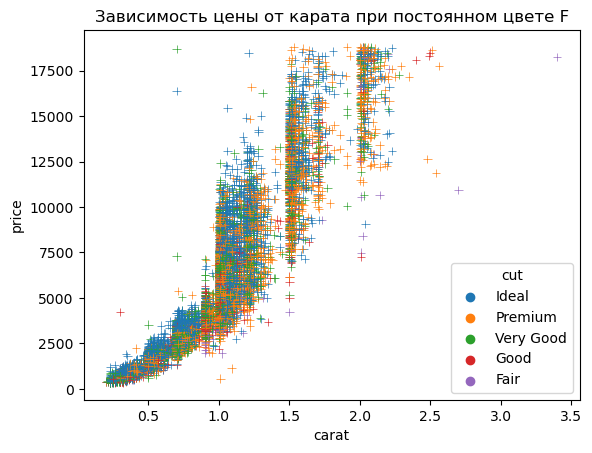

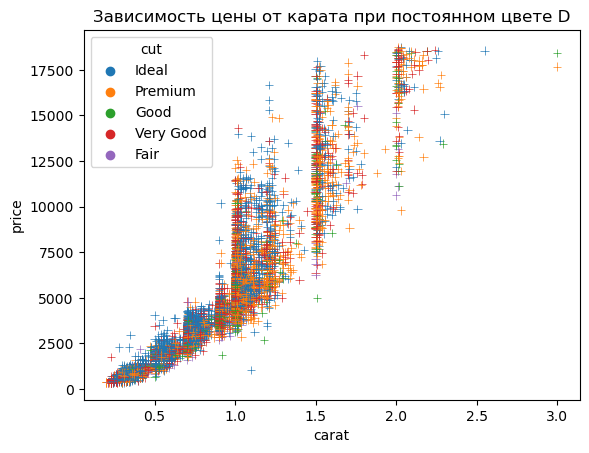

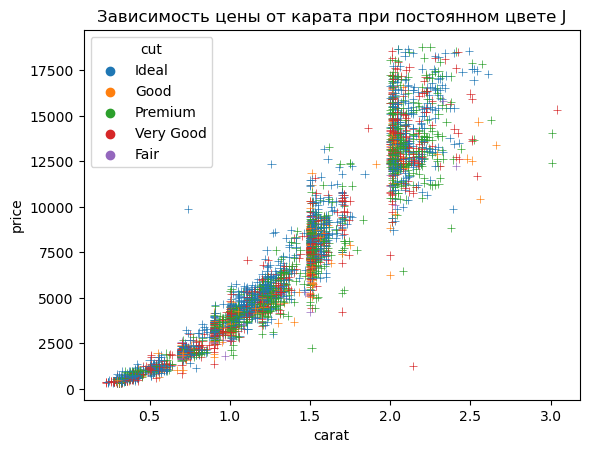

In [32]:
cut_list = list(df['cut'].unique())
print(cut_list)
for i in cut_list:
    cut_name = i
    df_var = df[df['cut'] == cut_name]
    plt.title("Зависимость цены от карата при постоянном качестве огранки: " + cut_name)
    sns.scatterplot(x= df_var['carat'], y = df_var['price'], hue = df_var['color'],marker="+")
    plt.show()

color_list = list(df['color'].unique())
print(color_list)
for i in color_list:
    color_list = i
    df_var = df[df['color'] == color_list]
    plt.title("Зависимость цены от карата при постоянном цвете " + color_list)
    sns.scatterplot(x= df_var['carat'], y = df_var['price'], hue = df_var['cut'],marker="+")
    plt.show()

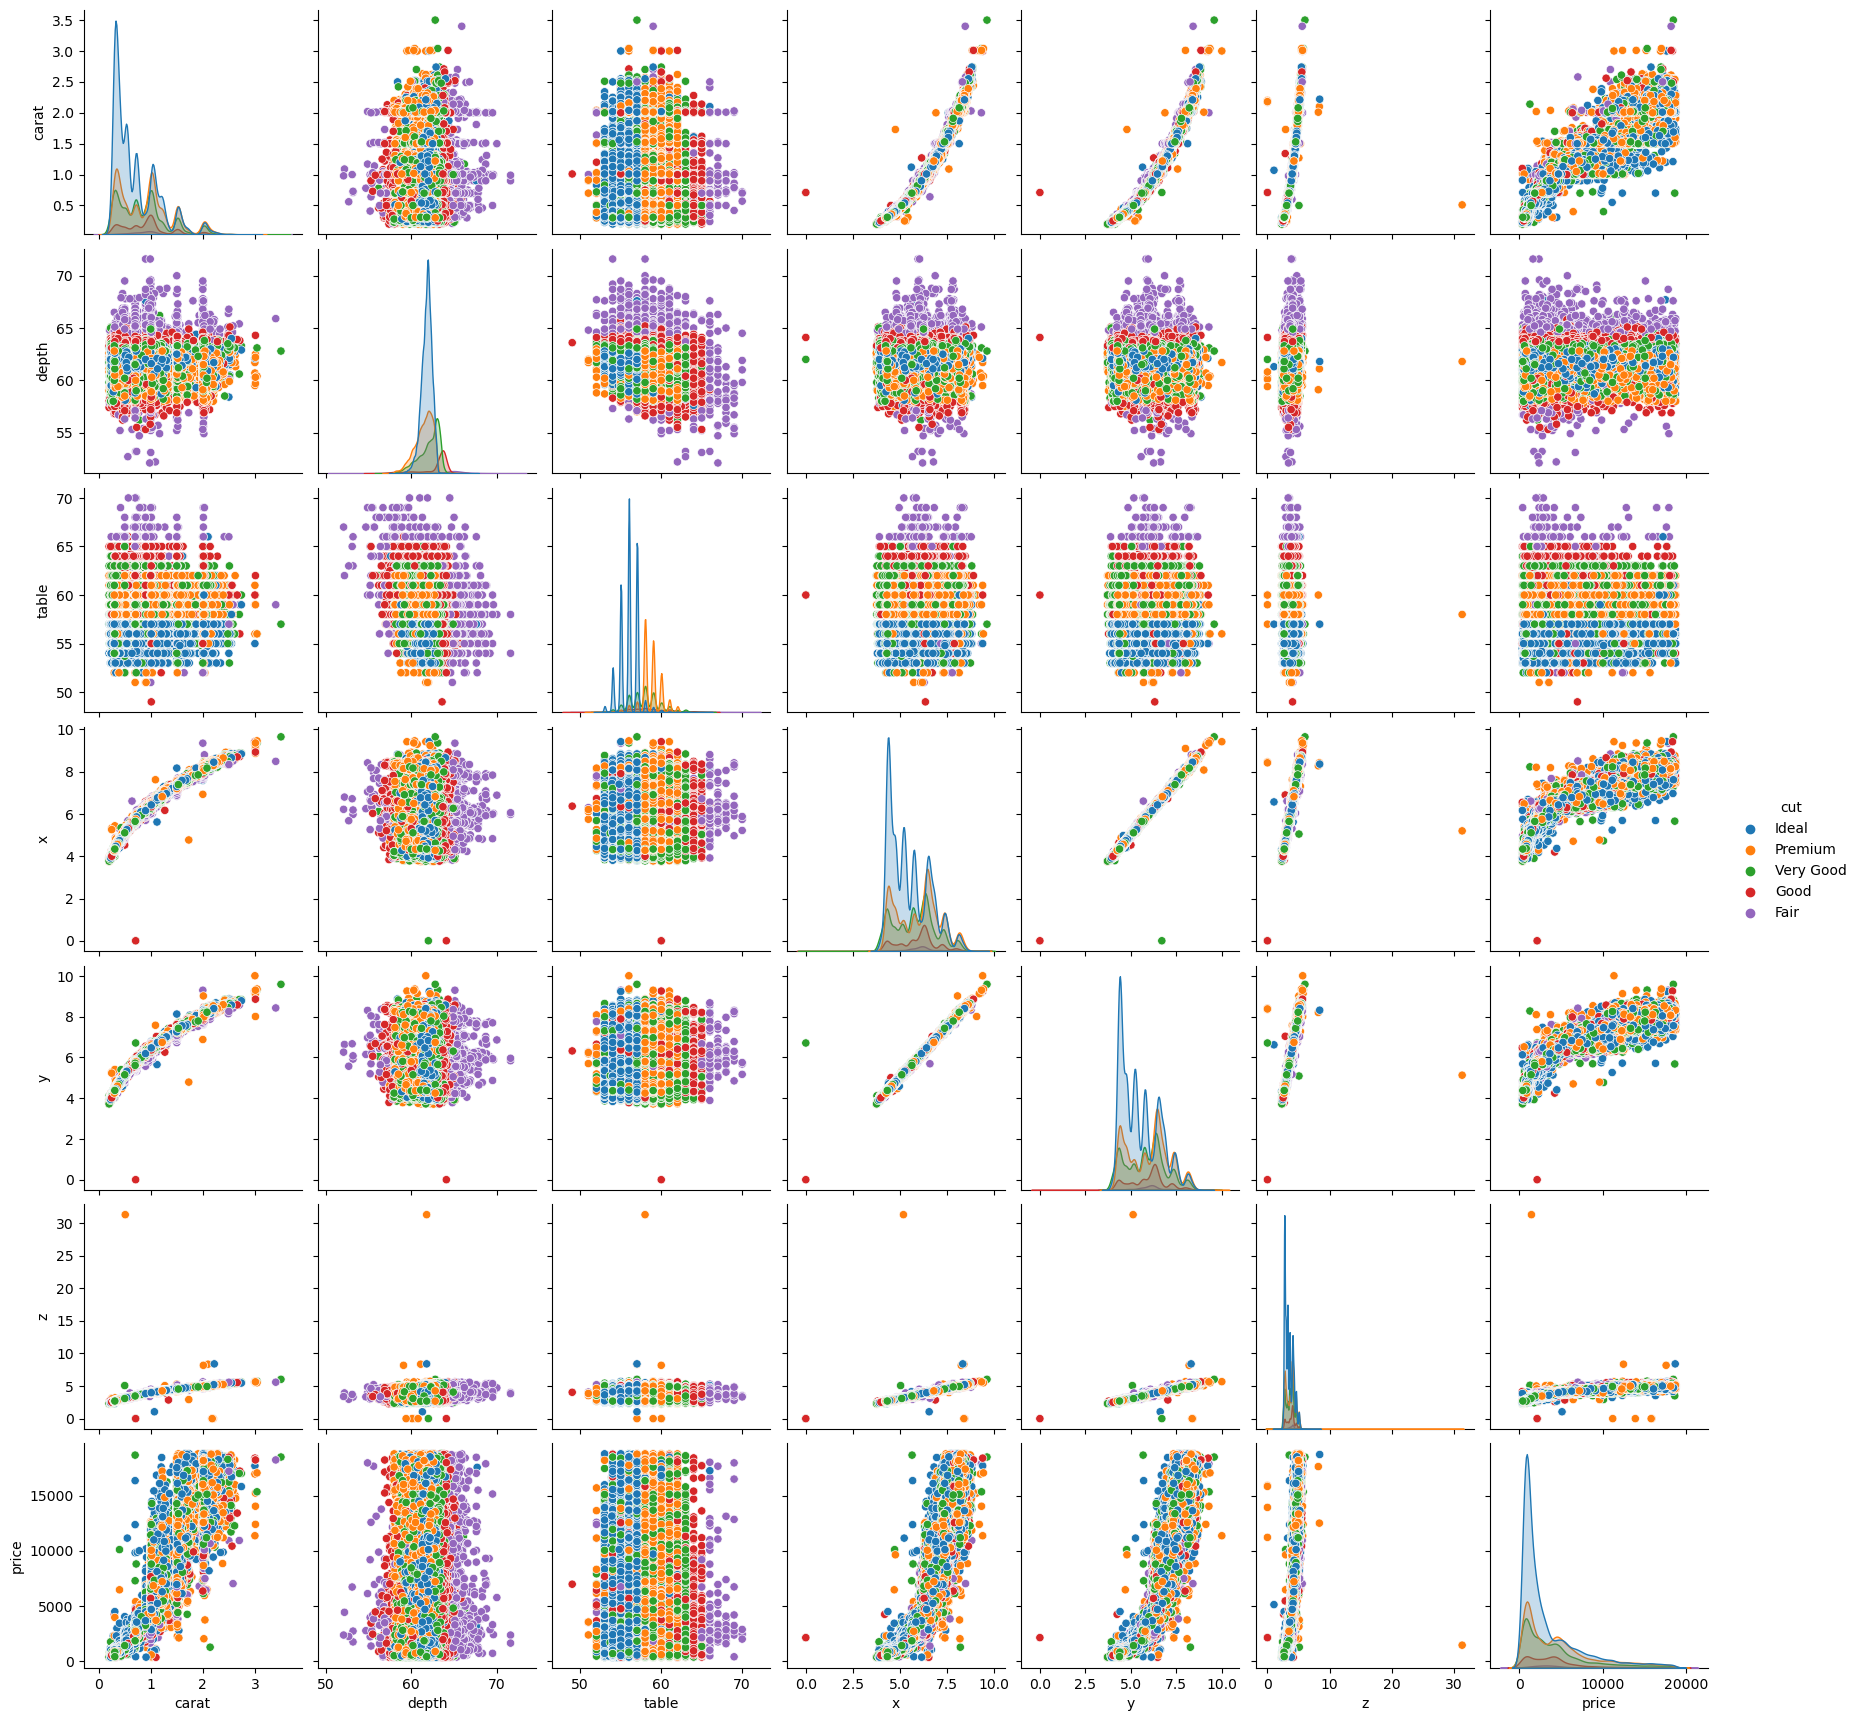

In [33]:
sns.pairplot(data = df, hue = 'cut')

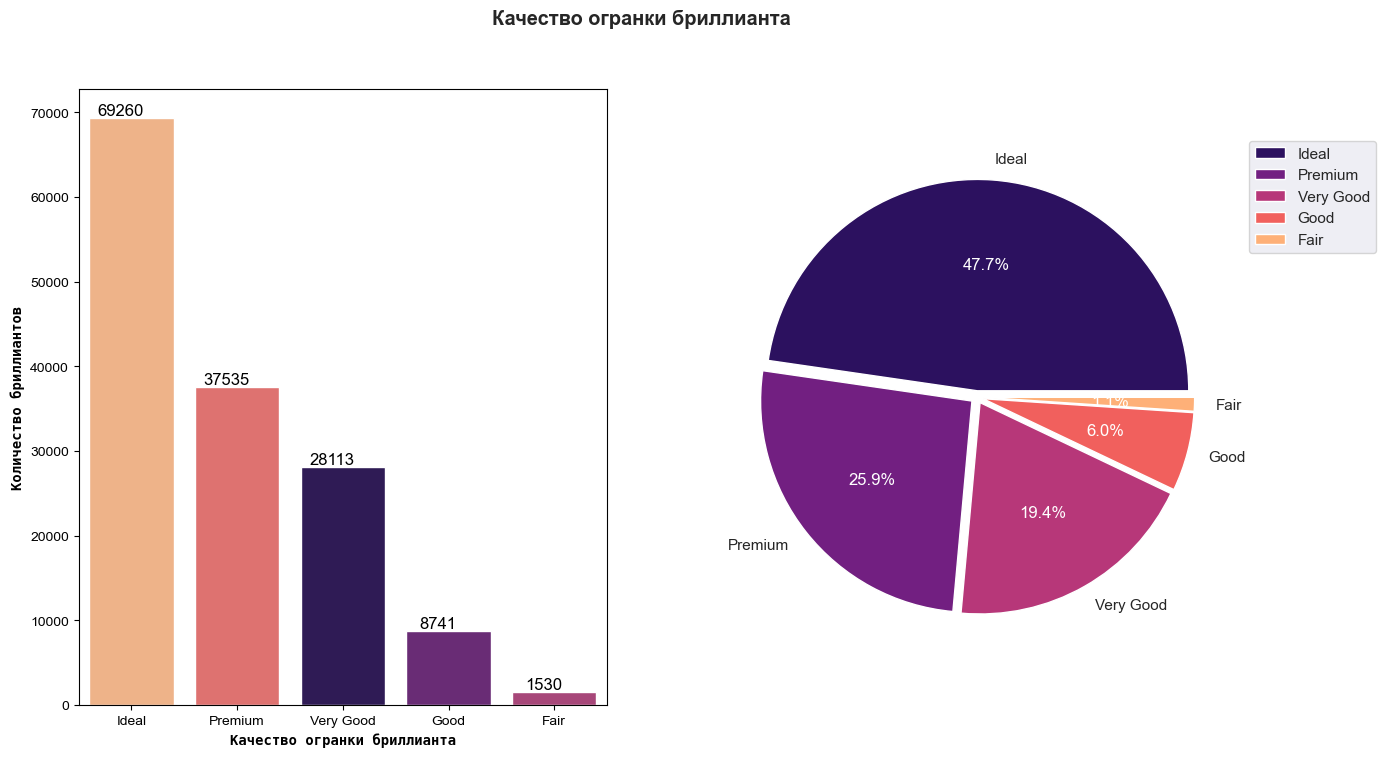

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['cut'].value_counts().index
y=df['cut'].value_counts().values.tolist()
data = df.groupby("cut").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Качество огранки бриллианта', weight='semibold', fontname = 'monospace')

ax[0].set_ylabel('Количество бриллиантов', weight='semibold', fontname = 'monospace')

_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['cut'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Качество огранки бриллианта',weight = 'bold')
plt.show()

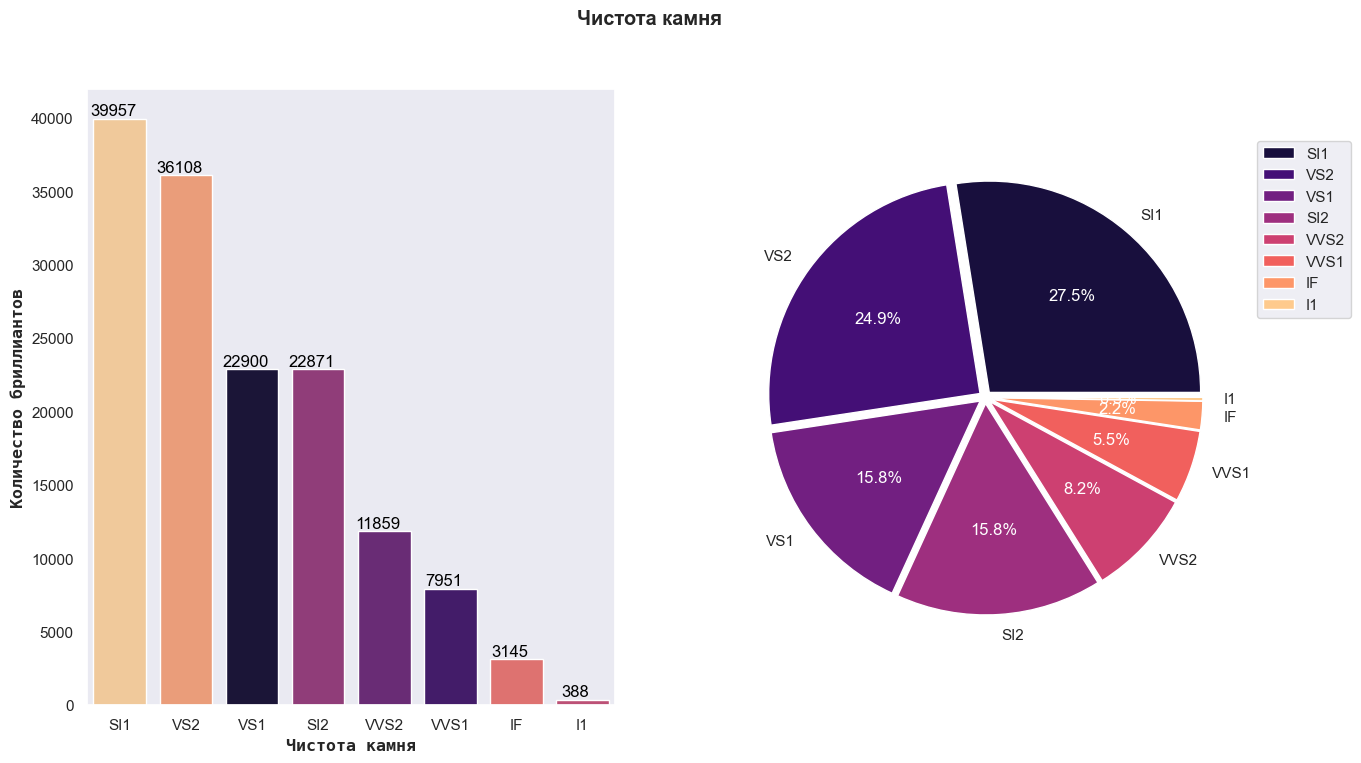

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['clarity'].value_counts().index
y=df['clarity'].value_counts().values.tolist()
data = df.groupby("clarity").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Чистота камня', weight='semibold', fontname = 'monospace')

ax[0].set_ylabel('Количество бриллиантов', weight='semibold', fontname = 'monospace')

_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['clarity'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Чистота камня' ,weight = 'bold')
plt.show()

Чистота (прозрачность) камня от худшего к лучшему - 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'. Получается наименьшее количество алмазов с худшей чистотой, а самых лучших тоже мало (1332), но и это нормально. 
Наибольшее количество бриллиантов занимают категории SI1,SI2,VS2 что является средним качеством прозрачности бриллианта

<Axes: >

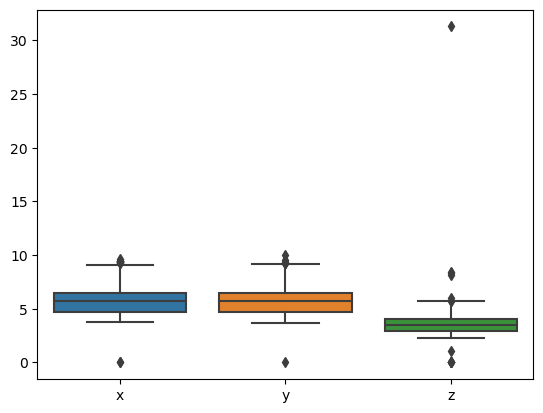

In [12]:
sns.boxplot(data = df[['x','y','z']])

Показатели длины, ширины и высоты бриллианта не могут быть нулевыми (0 мм).

Посмотрим, что это за выбросы в z, который больше 30 мм.


In [14]:
df[(df['z']>30)]

carat      cut color clarity  depth  table    x     y     z  price
124083   0.51  Premium     G     VS2   61.8   58.0  5.2  5.13  31.3   1447

In [15]:
df['carat']

0         1.01
1         1.08
2         2.02
3         0.32
4         0.74
          ... 
145174    0.50
145175    1.91
145176    1.22
145177    0.31
145178    0.31
Name: carat, Length: 145179, dtype: float64

In [16]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [17]:
df.query("carat == 0.51 and cut == 'Premium' and color =='G' and clarity == 'VS2'")

carat      cut color clarity  depth  table     x     y      z  price
1437     0.51  Premium     G     VS2   61.7   61.0  5.16  5.18   3.19   1443
8882     0.51  Premium     G     VS2   62.5   59.0  5.11  5.06   3.18   1588
16620    0.51  Premium     G     VS2   61.1   58.0  5.10  5.15   3.13   1546
25121    0.51  Premium     G     VS2   60.6   60.0  5.17  5.12   3.11   1608
26592    0.51  Premium     G     VS2   62.5   59.0  5.06  5.10   3.17   1546
30887    0.51  Premium     G     VS2   60.9   58.0  5.16  5.20   3.15   1588
35574    0.51  Premium     G     VS2   60.0   58.0  5.22  5.18   3.13   1435
43645    0.51  Premium     G     VS2   61.5   57.0  5.11  5.14   3.15   1546
43754    0.51  Premium     G     VS2   60.2   60.0  5.21  5.17   3.12   1433
48681    0.51  Premium     G     VS2   62.7   58.0  5.09  5.05   3.18   1546
50628    0.51  Premium     G     VS2   62.2   58.0  5.10  5.07   3.17   1443
53968    0.51  Premium     G     VS2   61.4   58.0  5.15  5.17   3.17   1412
57360    0.51  Premium     G     VS2   62.2   61.0  5.12  5.10   3.18   1448
63988    0.51  Premium     G     VS2   62.0   54.0  5.17  5.05   3.15   1546
74234    0.51  Premium     G     VS2   62.0   58.0  5.12  5.09   3.17   1437
77142    0.51  Premium     G     VS2   62.2   58.0  5.09  5.13   3.18   1422
92135    0.51  Premium     G     VS2   62.7   59.0  5.12  5.09   3.20   1546
92587    0.51  Premium     G     VS2   62.5   60.0  5.05  5.09   3.17   1546
92772    0.51  Premium     G     VS2   61.2   58.0  5.23  5.24   3.20   1637
96874    0.51  Premium     G     VS2   59.5   60.0  5.17  5.22   3.09   1637
97132    0.51  Premium     G     VS2   62.4   60.0  5.06  5.10   3.17   1437
103436   0.51  Premium     G     VS2   62.9   59.0  5.09  5.06   3.19   1443
106216   0.51  Premium     G     VS2   61.8   58.0  5.18  5.14   3.18   1446
109925   0.51  Premium     G     VS2   60.6   58.0  5.17  5.20   3.15   1418
113597   0.51  Premium     G     VS2   60.8   58.0  5.20  5.12   3.14   1546
121629   0.51  Premium     G     VS2   60.9   58.0  5.12  5.14   3.13   1569
122638   0.51  Premium     G     VS2   59.4   60.0  5.30  5.26   3.13   1358
123140   0.51  Premium     G     VS2   62.7   58.0  5.12  5.08   3.20   1546
124083   0.51  Premium     G     VS2   61.8   58.0  5.20  5.13  31.30   1447
128595   0.51  Premium     G     VS2   61.0   59.0  5.17  5.13   3.14   1307
129257   0.51  Premium     G     VS2   60.9   58.0  5.16  5.19   3.14   1415
132218   0.51  Premium     G     VS2   61.5   58.0  5.14  5.20   3.18   1437

In [18]:
df.query("carat == 0.51 and cut == 'Premium' and color =='G' and clarity == 'VS2' and depth==61.8")

carat      cut color clarity  depth  table     x     y      z  price
106216   0.51  Premium     G     VS2   61.8   58.0  5.18  5.14   3.18   1446
124083   0.51  Premium     G     VS2   61.8   58.0  5.20  5.13  31.30   1447

In [19]:

#Мы видим, что данные по бриилианту под номером 124083 явно были введены с ошибкой. 
#Используя формулу взаимосвязи характеристик бриллианта x, y , z и depth

# depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) 
# depth - общая глубина в процентах = height/mean(length,width)\

#Мы можем вычислить значени для z 
#z = d*(x+y)/2

In [20]:
depth = 31.3/np.mean([5.2,5.13]) 
depth

6.060019361084221

In [21]:
(2*31.3)/(5.2+5.13) 

6.060019361084221

In [22]:
#z = d*(x+y)/2

(61.8/100)*(5.18+5.14)/2

3.18888

In [23]:
(61.8/100)*(5.20+5.13)/2

3.19197

In [ ]:
У бриллианта под номером 106216 с похожими характеристиками z значение z в десять раз меньше

In [24]:
df.loc[124083, 'z']

31.3

In [25]:
dfd= df.copy()
dfd

carat        cut color clarity  depth  table     x     y     z  price
0        1.01      Ideal     I     SI2   62.1   56.0  6.39  6.41  3.98   4078
1        1.08      Ideal     H     VS2   62.7   55.0  6.53  6.59  4.09   5851
2        2.02    Premium     I     VS2   59.8   60.0  8.20  8.28  4.92  16383
3        0.32  Very Good     G     SI1   63.0   56.0  4.33  4.36  2.74    477
4        0.74       Good     E     SI2   63.4   64.0  5.76  5.71  3.63   2401
...       ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
145174   0.50  Very Good     E     SI1   60.2   61.0  5.11  5.15  3.09   1410
145175   1.91  Very Good     F     SI1   62.3   62.0  7.85  7.79  4.87  15064
145176   1.22    Premium     G     VS2   62.8   58.0  6.82  6.74  4.26   7209
145177   0.31  Very Good     G    VVS1   61.1   56.0  4.37  4.40  2.67    816
145178   0.31  Very Good     G     SI2   61.8   59.0  4.34  4.38  2.70    408

[145179 rows x 10 columns]

In [28]:
#Заменим значение для аномального z у камня под номером 124083 на значение, вычисленное по формуле

#z = d*(x+y)/2
#(61.8/100)*(5.18+5.14)/2

dfd.at[124083, 'z'] = (dfd.loc[124083, 'depth']/100)*((dfd.loc[124083, 'x']+dfd.loc[124083, 'y'])/2)
dfd.at[124083, 'z'] 

3.19197

In [29]:
dfd.loc[124083]

carat         0.51
cut        Premium
color            G
clarity        VS2
depth         61.8
table         58.0
x              5.2
y             5.13
z          3.19197
price         1447
Name: 124083, dtype: object

<Axes: >

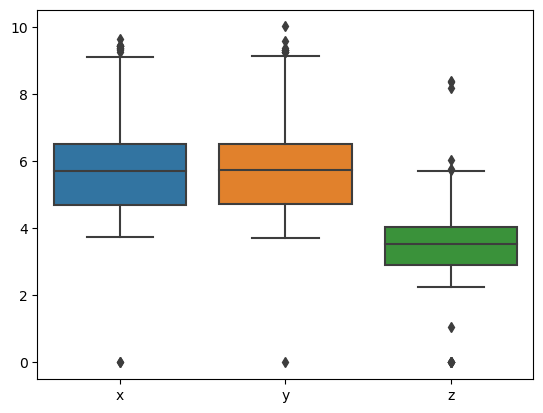

In [30]:
sns.boxplot(data = dfd[['x','y','z']])

In [31]:
# Обратим внимание на нулевые и близкие к нулевым значения x, y и z
dfd[(dfd['z']<2)]

carat        cut color clarity  depth  table     x     y     z  price
28099    2.17    Premium     H     SI2   60.3   57.0  8.42  8.36  0.00  15923
41748    1.07      Ideal     H     SI1   61.3   57.0  6.57  6.62  1.05   5125
44199    0.71  Very Good     F     SI2   62.0   60.0  0.00  6.71  0.00   2130
81538    2.20    Premium     I     SI2   60.1   60.0  8.45  8.41  0.00  11221
95099    0.71       Good     F     SI1   64.1   60.0  0.00  0.00  0.00   2130
110571   2.18    Premium     H     SI2   59.4   60.0  8.46  8.41  0.00  15842
127686   2.18    Premium     H     SI2   60.8   59.0  8.42  8.38  0.00  13938

In [32]:
(dfd.loc[41748, 'depth']/100)*((dfd.loc[41748, 'x']+dfd.loc[41748, 'y'])/2)

4.042735

In [34]:
# Аномальное значение параметра z для бриллианта 41748 явно введено с ошибкой
dfd.query("carat == 1.07 and cut == 'Ideal' and color =='H' and clarity == 'SI1' and depth == 61.3")

carat    cut color clarity  depth  table     x     y     z  price
9805    1.07  Ideal     H     SI1   61.3   57.0  6.58  6.62  4.05   5555
41748   1.07  Ideal     H     SI1   61.3   57.0  6.57  6.62  1.05   5125
68939   1.07  Ideal     H     SI1   61.3   54.0  6.60  6.66  4.07   5382

In [35]:
(dfd.loc[41748, 'depth']/100)*((dfd.loc[41748, 'x']+dfd.loc[41748, 'y'])/2)

4.042735

In [36]:
(dfd.loc[9805, 'depth']/100)*((dfd.loc[9805, 'x']+dfd.loc[9805, 'y'])/2)

4.0458

In [37]:
# Опираясь на размары аналогичных камней и произведенных вычислений, произведём замену этого показателя у камня 41748
dfd.at[41748, 'z'] = (dfd.loc[41748, 'depth']/100)*((dfd.loc[41748, 'x']+dfd.loc[41748, 'y'])/2)
dfd.at[41748, 'z'] 

4.042735

<Axes: >

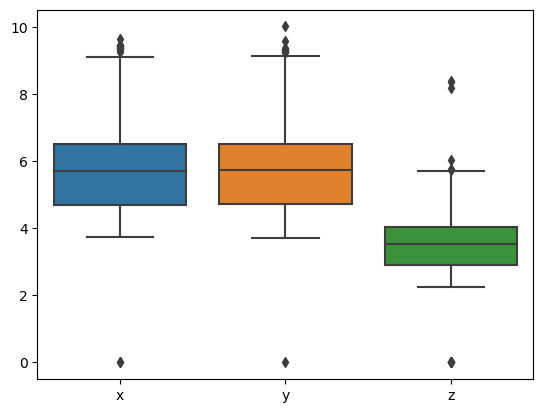

In [38]:
sns.boxplot(data = dfd[['x','y','z']])

In [39]:
dfd[(dfd['z']>6)]

carat        cut color clarity  depth  table     x     y     z  price
74373    3.50  Very Good     H     SI2   62.8   57.0  9.65  9.59  6.03  18507
80198    2.10    Premium     H      I1   61.1   57.0  8.42  8.28  8.35  12512
88644    2.01    Premium     I     VS1   59.1   60.0  8.28  8.21  8.18  17640
119299   2.22      Ideal     G     VS2   61.8   57.0  8.36  8.32  8.40  18736

In [40]:
for i in dfd[(dfd['z']>6)].index:
    print(i, (dfd.loc[i, 'depth']/100)*((dfd.loc[i, 'x']+dfd.loc[i, 'y'])/2))

74373 6.041360000000001
80198 5.10185
88644 4.872795
119299 5.15412


In [41]:
dfd.query(" carat > 1.5and cut == 'Ideal' and color =='G' and clarity == 'VS2' and depth==61.8 and table==57")

carat    cut color clarity  depth  table     x     y     z  price
17099    1.63  Ideal     G     VS2   61.8   57.0  7.56  7.49  4.65  16915
22235    1.53  Ideal     G     VS2   61.8   57.0  7.39  7.43  4.57  13325
29340    1.79  Ideal     G     VS2   61.8   57.0  7.87  7.80  4.84  16545
41341    1.60  Ideal     G     VS2   61.8   57.0  7.56  7.49  4.65  12725
43730    1.70  Ideal     G     VS2   61.8   57.0  7.59  7.67  4.71  15486
105594   1.51  Ideal     G     VS2   61.8   57.0  7.31  7.38  4.55  12831
113333   1.51  Ideal     G     VS2   61.8   57.0  7.37  7.32  4.54  12175
119299   2.22  Ideal     G     VS2   61.8   57.0  8.36  8.32  8.40  18736

In [45]:
# Опираясь на произведенные вычисления, осуществим замену одной из отсутствующих характеристик камння (z)
# Там, где неизвестно более одного значения из x, y, z будем использовать импутер

# z=(d/100)*(x+y)/2

for i in dfd.query(" z==0 and x != 0 and y != 0").index:
    print(i, (dfd.loc[i, 'depth']/100)*((dfd.loc[i,'x']+dfd.loc[i,'y'])/2))
    dfd.at[i, 'z'] = (dfd.loc[i, 'depth']/100)*((dfd.loc[i,'x']+dfd.loc[i,'y'])/2)

28099 5.05917
81538 5.0664299999999995
110571 5.01039
127686 5.1072


<Axes: >

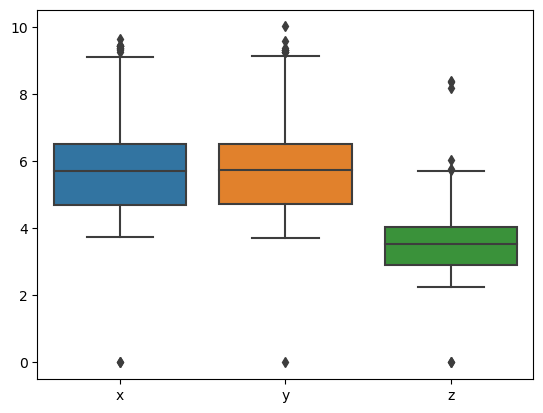

In [46]:
sns.boxplot(data = dfd[['x','y','z']])

In [ ]:
# Посмотрим на аномальные значения, исходя из правила трёх сигм

In [57]:
dfd.y.mean()+3*dfd.y.std()

9.031778296352574

In [52]:
dfd.x.mean()+3*dfd.x.std()

9.048337669687392

In [58]:
dfd.z.mean()+3*dfd.z.std()

5.594617645979884

In [59]:
dfd.query('x> 9.048337669687392 or y>9.031778296352574 or z>5.594617645979884')

carat        cut color clarity  depth  table     x      y     z  price
8880     3.01    Premium     I     SI2   62.5   60.0  9.10   8.01  5.67  15240
21534    3.00    Premium     I      I1   61.7   56.0  9.42  10.01  5.67  11370
25521    3.00    Premium     D     SI2   59.5   61.0  9.42   9.26  5.60  17674
35503    2.00       Fair     I     SI2   65.1   55.0  9.35   9.30  5.64  17893
51845    3.04  Very Good     J     SI2   63.1   56.0  9.36   9.31  5.75  15354
68101    3.00      Ideal     I     SI2   62.1   55.0  9.42   9.24  5.69  17712
74373    3.50  Very Good     H     SI2   62.8   57.0  9.65   9.59  6.03  18507
80055    2.74  Very Good     E     SI2   63.3   60.0  8.88   8.84  5.61  17024
80198    2.10    Premium     H      I1   61.1   57.0  8.42   8.28  8.35  12512
88644    2.01    Premium     I     VS1   59.1   60.0  8.28   8.21  8.18  17640
92914    3.00       Good     D      I1   60.3   60.0  9.42   9.26  5.60  18407
97681    3.00    Premium     I     SI2   60.7   59.0  9.30   9.14  5.60  16970
119299   2.22      Ideal     G     VS2   61.8   57.0  8.36   8.32  8.40  18736
122071   3.01    Premium     J     SI2   62.2   59.0  9.24   9.13  5.73  12401
131633   3.01       Good     I     SI2   64.3   62.0  8.93   8.86  5.64  18242
142925   3.04    Premium     I     SI2   60.4   56.0  9.46   9.36  5.50  17068
144281   3.01    Premium     J     SI2   60.3   59.0  9.36   9.30  5.64  14044

In [63]:
# Вычислим для них значения depth, исходя из имеющихся x, y и z
q =dfd.query('x> 9.048337669687392 or y>9.031778296352574 or z>5.594617645979884').copy()

q['new_depth'] = (2*100* q.z) / (q.x+q.y)
q

carat        cut color clarity  depth  table     x      y     z  \
8880     3.01    Premium     I     SI2   62.5   60.0  9.10   8.01  5.67   
21534    3.00    Premium     I      I1   61.7   56.0  9.42  10.01  5.67   
25521    3.00    Premium     D     SI2   59.5   61.0  9.42   9.26  5.60   
35503    2.00       Fair     I     SI2   65.1   55.0  9.35   9.30  5.64   
51845    3.04  Very Good     J     SI2   63.1   56.0  9.36   9.31  5.75   
68101    3.00      Ideal     I     SI2   62.1   55.0  9.42   9.24  5.69   
74373    3.50  Very Good     H     SI2   62.8   57.0  9.65   9.59  6.03   
80055    2.74  Very Good     E     SI2   63.3   60.0  8.88   8.84  5.61   
80198    2.10    Premium     H      I1   61.1   57.0  8.42   8.28  8.35   
88644    2.01    Premium     I     VS1   59.1   60.0  8.28   8.21  8.18   
92914    3.00       Good     D      I1   60.3   60.0  9.42   9.26  5.60   
97681    3.00    Premium     I     SI2   60.7   59.0  9.30   9.14  5.60   
119299   2.22      Ideal     G     VS2   61.8   57.0  8.36   8.32  8.40   
122071   3.01    Premium     J     SI2   62.2   59.0  9.24   9.13  5.73   
131633   3.01       Good     I     SI2   64.3   62.0  8.93   8.86  5.64   
142925   3.04    Premium     I     SI2   60.4   56.0  9.46   9.36  5.50   
144281   3.01    Premium     J     SI2   60.3   59.0  9.36   9.30  5.64   

        price   new_depth  
8880    15240   66.277031  
21534   11370   58.363356  
25521   17674   59.957173  
35503   17893   60.482574  
51845   15354   61.596144  
68101   17712   60.986066  
74373   18507   62.681913  
80055   17024   63.318284  
80198   12512  100.000000  
88644   17640   99.211643  
92914   18407   59.957173  
97681   16970   60.737527  
119299  18736  100.719424  
122071  12401   62.384322  
131633  18242   63.406408  
142925  17068   58.448459  
144281  14044   60.450161

In [67]:
q.query('x> 9.048337669687392 and y>9.031778296352574')

carat        cut color clarity  depth  table     x      y     z  \
21534    3.00    Premium     I      I1   61.7   56.0  9.42  10.01  5.67   
25521    3.00    Premium     D     SI2   59.5   61.0  9.42   9.26  5.60   
35503    2.00       Fair     I     SI2   65.1   55.0  9.35   9.30  5.64   
51845    3.04  Very Good     J     SI2   63.1   56.0  9.36   9.31  5.75   
68101    3.00      Ideal     I     SI2   62.1   55.0  9.42   9.24  5.69   
74373    3.50  Very Good     H     SI2   62.8   57.0  9.65   9.59  6.03   
92914    3.00       Good     D      I1   60.3   60.0  9.42   9.26  5.60   
97681    3.00    Premium     I     SI2   60.7   59.0  9.30   9.14  5.60   
122071   3.01    Premium     J     SI2   62.2   59.0  9.24   9.13  5.73   
142925   3.04    Premium     I     SI2   60.4   56.0  9.46   9.36  5.50   
144281   3.01    Premium     J     SI2   60.3   59.0  9.36   9.30  5.64   

        price  new_depth  
21534   11370  58.363356  
25521   17674  59.957173  
35503   17893  60.482574  
51845   15354  61.596144  
68101   17712  60.986066  
74373   18507  62.681913  
92914   18407  59.957173  
97681   16970  60.737527  
122071  12401  62.384322  
142925  17068  58.448459  
144281  14044  60.450161

In [68]:
q.query('x<= 9.048337669687392 and y<=9.031778296352574')

carat        cut color clarity  depth  table     x     y     z  price  \
80055    2.74  Very Good     E     SI2   63.3   60.0  8.88  8.84  5.61  17024   
80198    2.10    Premium     H      I1   61.1   57.0  8.42  8.28  8.35  12512   
88644    2.01    Premium     I     VS1   59.1   60.0  8.28  8.21  8.18  17640   
119299   2.22      Ideal     G     VS2   61.8   57.0  8.36  8.32  8.40  18736   
131633   3.01       Good     I     SI2   64.3   62.0  8.93  8.86  5.64  18242   

         new_depth  
80055    63.318284  
80198   100.000000  
88644    99.211643  
119299  100.719424  
131633   63.406408

In [ ]:
# У камней 80198, 88644 и 119299 вычисленные значения depth очень сильно отличаются от тех значений, что есть в датасете

In [71]:
dfd.query('z>8')

carat      cut color clarity  depth  table     x     y     z  price
80198    2.10  Premium     H      I1   61.1   57.0  8.42  8.28  8.35  12512
88644    2.01  Premium     I     VS1   59.1   60.0  8.28  8.21  8.18  17640
119299   2.22    Ideal     G     VS2   61.8   57.0  8.36  8.32  8.40  18736

In [78]:
dfd.query("cut == 'Premium' and color =='H' and clarity == 'I1' and depth==61.1 and table==57")

carat      cut color clarity  depth  table     x     y     z  price
80198    2.1  Premium     H      I1   61.1   57.0  8.42  8.28  8.35  12512
99324    1.1  Premium     H      I1   61.1   57.0  6.63  6.67  4.06   3669

In [79]:
dfd.at[99324, 'z'] = (dfd.loc[99324, 'depth']/100)*((dfd.loc[99324, 'x']+dfd.loc[99324, 'y'])/2)
dfd.at[99324, 'z']

4.06315

In [80]:
for i in dfd.query(" z>8").index:
    print(i, (dfd.loc[i, 'depth']/100)*((dfd.loc[i,'x']+dfd.loc[i,'y'])/2))
    dfd.at[i, 'z'] = (dfd.loc[i, 'depth']/100)*((dfd.loc[i,'x']+dfd.loc[i,'y'])/2)

80198 5.10185
88644 4.872795
119299 5.15412


<Axes: >

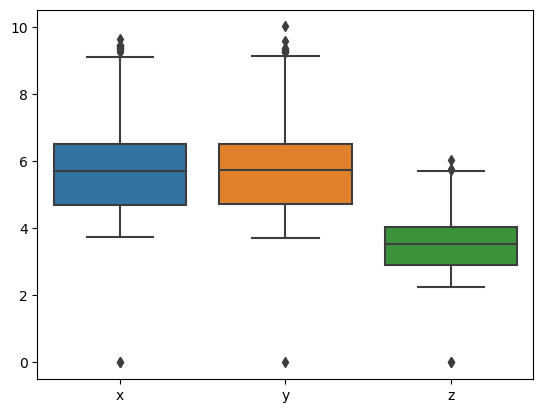

In [81]:
sns.boxplot(data = dfd[['x','y','z']])

In [ ]:
# Нулевые значения будут заданы при помощи импутера. Природа остальных выбросов нам неизвестна. 
# Вычисленные по формуле для этих выбросов значения depth хоть и отличаются от исходных значений, но не так сильно.
# Сложно преположить, была ли там ошибка заполнения данных, а если и была, то в каком именно показателе, или это бриллианты
# действительно таких размеров. Мы этого не знаем, гадать не будем, и оставим оставшиеся выбросы в верней части
# боксплота как есть, без корректировки.


In [82]:
y = np.array(dfd.price)
X = dfd.drop(columns=['price'])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True)

In [96]:
axis_features = ['x','y','z']
num_features = ['carat','depth','table']

axis_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=0, strategy='mean',add_indicator=False)),
    ('polynom', PolynomialFeatures(2,include_bias=False)),
    ('scaler', RobustScaler())])


color_map = [{
    'col':'color',
    'mapping':{'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}
    }]

color_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=color_map)),
    ('scaler', MinMaxScaler())
    ])

clarity_map = [{
    'col':'clarity',##### Обратить внимание
    'mapping':{'FL':10, 'IF':9, 'VVS1':8, 'VVS2':7, 'VS1':6, 'VS2':5, 
               'SI1':4, 'SI2':3, 'I1':2, 'I2':1, 'I3':0}
    }]

clarity_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', MinMaxScaler())
    ])

cut_map = [
    {'col':'cut',
    'mapping':{"Fair":0, "Good":1, "Very Good":2, "Premium":3,"Ideal":4}
    }]

cut_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=cut_map)),
    ('scaler', MinMaxScaler())
    ])
    

CT = ColumnTransformer([
        ("pol_std", axis_transformer, axis_features),
        ("num", Normalizer(), num_features),
        ("ordinal_map_color", color_transformer, ['color']) ,
        ("ordinal_map_cut", cut_transformer, ['cut']) ,
        ("ordinal_map", clarity_transformer, ['clarity'])], 
        remainder = 'passthrough')

display(CT)

res_ct = CT.fit_transform(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pol_std',
                                 Pipeline(steps=[('imputer',
                                                  IterativeImputer(max_iter=20,
                                                                   missing_values=0)),
                                                 ('polynom',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scaler', RobustScaler())]),
                                 ['x', 'y', 'z']),
                                ('num', Normalizer(),
                                 ['carat', 'depth', 'table']),
                                ('ordinal_map_color',
                                 Pipeline(steps=[('ce',
                                                  OrdinalEncoder(mapping=[...
                                                  OrdinalEncoder(mapping=[{'col': 'cut',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Fair         0
Good         1
Very Good    2
Premium      3
Ideal        4
dtype: int64}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['cut']),
                                ('ordinal_map',
                                 Pipeline(steps=[('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': FL      10
IF       9
VVS1     8
VVS2     7
VS1      6
VS2      5
SI1      4
SI2      3
I1       2
I2       1
I3       0
dtype: int64}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['clarity'])])

In [97]:
res_ct

array([[ 0.03867403,  0.00555556,  0.04424779, ...,  0.83333333,
         0.75      ,  0.42857143],
       [ 0.22651934,  0.2       ,  0.22123894, ...,  0.33333333,
         0.5       ,  0.71428571],
       [ 0.90607735,  0.93333333,  0.89380531, ...,  0.        ,
         1.        ,  0.42857143],
       ...,
       [ 0.6961326 ,  0.65555556,  0.65486726, ...,  0.5       ,
         0.75      ,  0.57142857],
       [ 0.37569061,  0.33888889,  0.42477876, ...,  0.66666667,
         0.75      ,  0.28571429],
       [-0.96132597, -0.94444444, -0.97345133, ...,  0.33333333,
         0.5       ,  0.71428571]])

In [98]:
X_train_new = pd.DataFrame(res_ct, columns=['x', 'y', 'z', 'x^2', 'xy', 'xz', 'y^2', 'yz', 'z^2', 'carat', 
                                            'depth', 'table', 'cut', 'color',  'clarity'])


X_train_new.T

0         1         2         3         4         5         6       \
x        0.038674  0.226519  0.906077  1.055249 -0.353591 -0.519337  0.911602   
y        0.005556  0.200000  0.933333  1.077778 -0.344444 -0.550000  0.933333   
z        0.044248  0.221239  0.893805  1.035398 -0.274336 -0.513274  0.911504   
x^2      0.039640  0.239048  1.055608  1.254814 -0.340028 -0.485518  1.062858   
xy       0.022665  0.224723  1.073444  1.270018 -0.336101 -0.498871  1.077099   
xz       0.045236  0.243138  1.072896  1.271106 -0.308786 -0.491504  1.088509   
y^2      0.005669  0.210339  1.091384  1.285264 -0.332165 -0.512255  1.091384   
yz       0.026152  0.226806  1.089364  1.284897 -0.306352 -0.506965  1.101391   
z^2      0.045397  0.233370  1.040838  1.229629 -0.267211 -0.479945  1.064079   
carat    0.008631  0.010506  0.018015  0.020219  0.005992  0.004826  0.018103   
depth    0.725496  0.724930  0.739820  0.745785  0.742579  0.748066  0.740903   
table    0.688172  0.688742  0.672564  0.665880  0.669731  0.663607  0.671368   
cut      0.833333  0.333333  0.000000  0.166667  0.333333  0.500000  0.333333   
color    0.750000  0.500000  1.000000  1.000000  0.500000  1.000000  1.000000   
clarity  0.428571  0.714286  0.428571  0.571429  0.857143  0.571429  0.714286   

           7         8         9       ...    108874    108875    108876  \
x       -0.276243 -0.535912 -0.320442  ... -0.613260  0.364641  0.331492   
y       -0.261111 -0.550000 -0.344444  ... -0.600000  0.377778  0.372222   
z       -0.327434 -0.522124 -0.327434  ... -0.637168  0.424779  0.442478   
x^2     -0.269097 -0.499579 -0.309865  ... -0.564024  0.392940  0.355444   
xy      -0.262223 -0.505881 -0.320985  ... -0.559046  0.400510  0.378423   
xz      -0.297583 -0.502521 -0.318076  ... -0.584367  0.438518  0.429244   
y^2     -0.255293 -0.512255 -0.332165  ... -0.554011  0.408081  0.401748   
yz      -0.292699 -0.510809 -0.331220  ... -0.581334  0.444737  0.451864   
z^2     -0.316094 -0.487466 -0.316094  ... -0.582922  0.462169  0.482703   
carat    0.006225  0.004779  0.005964  ...  0.004281  0.011814  0.011743   
depth    0.709438  0.743167  0.723847  ...  0.724131  0.734573  0.738309   
table    0.704740  0.669089  0.689935  ...  0.689649  0.678427  0.674361   
cut      0.666667  0.500000  1.000000  ...  0.666667  0.500000  0.333333   
color    0.500000  1.000000  0.500000  ...  0.500000  0.750000  0.250000   
clarity  0.142857  0.714286  0.428571  ...  0.285714  0.142857  0.285714   

           108877    108878    108879    108880    108881    108882    108883  
x        0.049724  1.464088 -0.232044 -0.066298  0.696133  0.375691 -0.961326  
y        0.016667  1.427778 -0.255556 -0.055556  0.655556  0.338889 -0.944444  
z        0.088496  1.371681 -0.203540 -0.008850  0.654867  0.424779 -0.973451  
x^2      0.051054  1.837620 -0.227697 -0.066831  0.787418  0.405518 -0.830119  
xy       0.034057  1.810223 -0.238861 -0.061494  0.762369  0.384736 -0.825048  
xz       0.074550  1.810594 -0.217050 -0.037096  0.780477  0.445020 -0.850179  
y^2      0.017038  1.782813 -0.250089 -0.056150  0.737354  0.363958 -0.819865  
yz       0.055336  1.781549 -0.230284 -0.033255  0.753478  0.421925 -0.847068  
z^2      0.091433  1.704210 -0.200603 -0.009003  0.737080  0.462169 -0.837196  
carat    0.008711  0.025178  0.006846  0.008188  0.014536  0.011701  0.002927  
depth    0.728241  0.724473  0.750696  0.734599  0.722107  0.729848  0.741590  
table    0.685266  0.688843  0.660612  0.678452  0.691629  0.683509  0.670847  
cut      0.833333  0.333333  0.833333  0.666667  0.500000  0.666667  0.333333  
color    0.750000  0.750000  1.000000  0.750000  0.750000  0.750000  0.500000  
clarity  0.285714  0.285714  0.285714  0.142857  0.571429  0.285714  0.714286  

[15 rows x 108884 columns]

Проведем предварительную проверку моделей на точность через кросс-валидацию, используя 4 основные модели KNN, Ridge, Lasso, LinearRegression. Метрику используем MSE

In [99]:
reg_list = [KNeighborsRegressor(), Ridge(), Lasso(), LinearRegression()]
cv_list = []
for reg in reg_list:
    pipe = Pipeline([('preprocessing', CT),
                ('regression', reg)])
    cv_results = cross_validate(pipe, X_train, y_train, cv=ShuffleSplit(), scoring = 'neg_mean_squared_error')
    cv_list.append(cv_results['test_score'])
cv_list

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.900e+09, tolerance: 1.583e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.898e+09, tolerance: 1.586e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.923e+09, toleranc

[array([-461757.11325558, -435614.05004684, -402937.74830747,
        -405217.53058316, -448992.96480485, -397511.37154192,
        -403566.07825879, -409249.88229222, -414647.00515382,
        -414459.90147121]),
 array([ -975247.353487  ,  -919468.37847452, -1040654.26416014,
         -973665.29327422,  -981496.27848836,  -992742.9351998 ,
         -960979.05529083,  -999582.01997873,  -971376.77985737,
        -1015762.69809998]),
 array([-1005377.21061218,  -988214.01936909, -1003699.80587863,
         -951538.46897527,  -940673.63205722,  -969583.25526364,
         -985658.02538299,  -986102.23484665,  -981769.56382237,
        -1023327.16181763]),
 array([ -973874.19841342,  -976365.58821845,  -981516.58466106,
         -963918.63492612,  -989259.94444073,  -960368.4482498 ,
         -922610.12459113,  -979875.88127478, -1021850.46861256,
        -1042577.21213875])]

In [100]:
cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = [str(i) for i in reg_list]
cv_df

KNeighborsRegressor()       Ridge()       Lasso()  LinearRegression()
0         -461757.113256 -9.752474e+05 -1.005377e+06       -9.738742e+05
1         -435614.050047 -9.194684e+05 -9.882140e+05       -9.763656e+05
2         -402937.748307 -1.040654e+06 -1.003700e+06       -9.815166e+05
3         -405217.530583 -9.736653e+05 -9.515385e+05       -9.639186e+05
4         -448992.964805 -9.814963e+05 -9.406736e+05       -9.892599e+05
5         -397511.371542 -9.927429e+05 -9.695833e+05       -9.603684e+05
6         -403566.078259 -9.609791e+05 -9.856580e+05       -9.226101e+05
7         -409249.882292 -9.995820e+05 -9.861022e+05       -9.798759e+05
8         -414647.005154 -9.713768e+05 -9.817696e+05       -1.021850e+06
9         -414459.901471 -1.015763e+06 -1.023327e+06       -1.042577e+06

<Axes: >

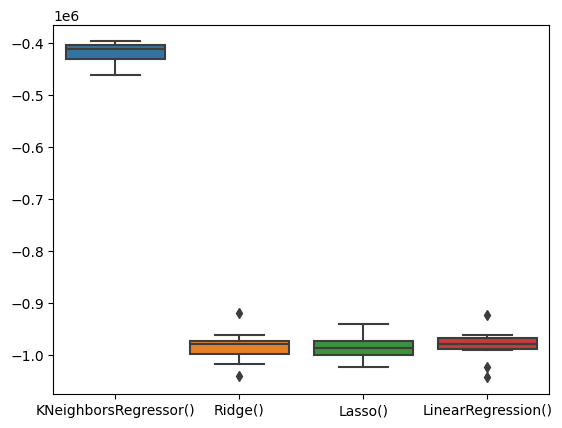

In [101]:
sns.boxplot(data = cv_df)

In [ ]:
# Из этого рисунка видно, что метод ближайших соседей лучше, чем Ridge, Lasso и LinearRegression
# Сделаем GridSearch для поиска гиперпарамметров для ближайших соседей

In [147]:

pipe = Pipeline([ ('preprocessing', CT) , ('regression', KNeighborsRegressor())])

n_neighbors  = [1,10,20] #np.arange(1,20)
p= [2, 3]
weights = ['distance']

param_grid = [
    {'regression': [KNeighborsRegressor()],
     'regression__n_neighbors': n_neighbors,
     'regression__p': p,
     'regression__weights': weights
    }
]


grid = GridSearchCV(pipe,param_grid, cv=5,
                    return_train_score = True, 
                   n_jobs = -1, scoring = 'neg_mean_squared_error') # решетчатый поиск


grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pol_std',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(max_iter=20,
                                                                                                           missing_values=0)),
                                                                                         ('polynom',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['x',
                                                                          'y',
                                                                          'z']),
                                                                        ('num',
                                                                         Normalizer(),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table']),
                                                                        ('ordi...
I3       0
dtype: int64}])),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['clarity'])])),
                                       ('regression', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid=[{'regression': [KNeighborsRegressor(n_neighbors=20,
                                                             p=3,
                                                             weights='distance')],
                          'regression__n_neighbors': [1, 10, 20],
                          'regression__p': [2, 3],
                          'regression__weights': ['distance']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [148]:
grid.best_score_

-372291.39079198753

In [149]:
grid.best_params_

{'regression': KNeighborsRegressor(n_neighbors=20, p=3, weights='distance'),
 'regression__n_neighbors': 20,
 'regression__p': 3,
 'regression__weights': 'distance'}

In [150]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

5  \
mean_fit_time                                                           2.468587   
std_fit_time                                                            0.284999   
mean_score_time                                                        29.436363   
std_score_time                                                          4.867069   
param_regression               KNeighborsRegressor(n_neighbors=20, p=3, weigh...   
param_regression__n_neighbors                                                 20   
param_regression__p                                                            3   
param_regression__weights                                               distance   
params                         {'regression': KNeighborsRegressor(n_neighbors...   
split0_test_score                                                 -392359.997051   
split1_test_score                                                 -378373.795035   
split2_test_score                                                 -359737.640693   
split3_test_score                                                  -379806.45255   
split4_test_score                                                  -351179.06863   
mean_test_score                                                   -372291.390792   
std_test_score                                                      14829.346179   
rank_test_score                                                                1   
split0_train_score                                                    -77.355708   
split1_train_score                                                    -77.599255   
split2_train_score                                                    -70.673823   
split3_train_score                                                    -77.158743   
split4_train_score                                                    -76.832537   
mean_train_score                                                      -75.924013   
std_train_score                                                         2.637069   

                                                                               4  \
mean_fit_time                                                           2.580724   
std_fit_time                                                            0.281711   
mean_score_time                                                         4.907395   
std_score_time                                                          0.497027   
param_regression               KNeighborsRegressor(n_neighbors=20, p=3, weigh...   
param_regression__n_neighbors                                                 20   
param_regression__p                                                            2   
param_regression__weights                                               distance   
params                         {'regression': KNeighborsRegressor(n_neighbors...   
split0_test_score                                                 -394301.202063   
split1_test_score                                                 -380689.833463   
split2_test_score                                                 -362845.141134   
split3_test_score                                                 -380526.423078   
split4_test_score                                                 -353432.546606   
mean_test_score                                                   -374359.029269   
std_test_score                                                      14465.776028   
rank_test_score                                                                2   
split0_train_score                                                    -77.355708   
split1_train_score                                                    -77.599255   
split2_train_score                                                    -70.673823   
split3_train_score                                                    -77.158743   
split4_train_score                                                    -76.832537   
mean_train_score                              

In [151]:

pipe = Pipeline([ ('preprocessing', CT) , ('regression', KNeighborsRegressor())])

n_neighbors  = np.arange(20,26)
p= [3,4]
weights = ['distance']

param_grid = [
    {'regression': [KNeighborsRegressor()],
     'regression__n_neighbors': n_neighbors,
     'regression__p': p,
     'regression__weights': weights
    }
] 



grid_n = GridSearchCV(pipe,param_grid, cv=5,
                    return_train_score = True, 
                   n_jobs = -1, scoring = 'neg_mean_squared_error') # решетчатый поиск


grid_n.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pol_std',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(max_iter=20,
                                                                                                           missing_values=0)),
                                                                                         ('polynom',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['x',
                                                                          'y',
                                                                          'z']),
                                                                        ('num',
                                                                         Normalizer(),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table']),
                                                                        ('ordi...
dtype: int64}])),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['clarity'])])),
                                       ('regression', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid=[{'regression': [KNeighborsRegressor(n_neighbors=25,
                                                             p=4,
                                                             weights='distance')],
                          'regression__n_neighbors': array([20, 21, 22, 23, 24, 25]),
                          'regression__p': [3, 4],
                          'regression__weights': ['distance']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [152]:
grid_n.best_score_

-371211.6958795333

In [153]:
grid_n.best_params_

{'regression': KNeighborsRegressor(n_neighbors=25, p=4, weights='distance'),
 'regression__n_neighbors': 25,
 'regression__p': 4,
 'regression__weights': 'distance'}

In [175]:
pd.DataFrame(grid_n.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

9   \
mean_fit_time                                                           2.091791   
std_fit_time                                                             0.09816   
mean_score_time                                                        26.153738   
std_score_time                                                          0.173051   
param_regression               KNeighborsRegressor(n_neighbors=24, p=4, weigh...   
param_regression__n_neighbors                                                 24   
param_regression__p                                                            4   
param_regression__weights                                               distance   
params                         {'regression': KNeighborsRegressor(n_neighbors...   
split0_test_score                                                 -375396.997625   
split1_test_score                                                 -362226.426862   
split2_test_score                                                 -398733.298885   
split3_test_score                                                 -361221.760416   
split4_test_score                                                 -335321.455564   
mean_test_score                                                    -366579.98787   
std_test_score                                                      20670.437862   
rank_test_score                                                                1   
split0_train_score                                                    -86.034593   
split1_train_score                                                    -73.912542   
split2_train_score                                                    -87.495894   
split3_train_score                                                    -95.279162   
split4_train_score                                                    -66.009129   
mean_train_score                                                      -81.746264   
std_train_score                                                        10.427003   

                                                                              7   \
mean_fit_time                                                           2.328213   
std_fit_time                                                            0.324158   
mean_score_time                                                        27.566514   
std_score_time                                                          3.633978   
param_regression               KNeighborsRegressor(n_neighbors=24, p=4, weigh...   
param_regression__n_neighbors                                                 23   
param_regression__p                                                            4   
param_regression__weights                                               distance   
params                         {'regression': KNeighborsRegressor(n_neighbors...   
split0_test_score                                                 -375180.704657   
split1_test_score                                                 -362018.454902   
split2_test_score                                                 -399003.482597   
split3_test_score                                                 -361171.805978   
split4_test_score                                                 -335589.378613   
mean_test_score                                                   -366592.765349   
std_test_score                                                      20667.502993   
rank_test_score                                                                2   
split0_train_score                                                    -86.034593   
split1_train_score                                                    -73.912542   
split2_train_score                                                    -87.495894   
split3_train_score                                                    -95.279162   
split4_train_score                                                    -66.009129   
mean_train_score                             

In [113]:
pipe = Pipeline([ ('preprocessing', CT) , ('regression', KNeighborsRegressor())])

n_neighbors  = [24,25,26,27,28,29,30] #np.arange(20,26)
p= [4]
weights = ['distance']

param_grid = [
    {'regression': [KNeighborsRegressor()],
     'regression__n_neighbors': n_neighbors,
     'regression__p': p,
     'regression__weights': weights
    }
] #решетка



grid_n2 = GridSearchCV(pipe,param_grid, cv=5,
                    return_train_score = True, 
                   n_jobs = -1, scoring = 'neg_mean_squared_error') # решетчатый поиск


grid_n2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pol_std',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(max_iter=20,
                                                                                                           missing_values=0)),
                                                                                         ('polynom',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['x',
                                                                          'y',
                                                                          'z']),
                                                                        ('num',
                                                                         Normalizer(),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table']),
                                                                        ('ordi...
dtype: int64}])),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['clarity'])])),
                                       ('regression', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid=[{'regression': [KNeighborsRegressor(n_neighbors=26,
                                                             p=4,
                                                             weights='distance')],
                          'regression__n_neighbors': [24, 25, 26, 27, 28, 29,
                                                      30],
                          'regression__p': [4],
                          'regression__weights': ['distance']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [114]:
grid_n2.best_score_

-371184.7370833758

In [115]:
grid_n2.best_params_

{'regression': KNeighborsRegressor(n_neighbors=26, p=4, weights='distance'),
 'regression__n_neighbors': 26,
 'regression__p': 4,
 'regression__weights': 'distance'}

In [116]:
pd.DataFrame(grid_n2.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

2  \
mean_fit_time                                                           3.081797   
std_fit_time                                                            0.784698   
mean_score_time                                                        38.198162   
std_score_time                                                          6.345696   
param_regression               KNeighborsRegressor(n_neighbors=26, p=4, weigh...   
param_regression__n_neighbors                                                 26   
param_regression__p                                                            4   
param_regression__weights                                               distance   
params                         {'regression': KNeighborsRegressor(n_neighbors...   
split0_test_score                                                 -391961.734629   
split1_test_score                                                 -375209.648895   
split2_test_score                                                 -359398.089649   
split3_test_score                                                   -377883.4179   
split4_test_score                                                 -351470.794344   
mean_test_score                                                   -371184.737083   
std_test_score                                                      14285.100369   
rank_test_score                                                                1   
split0_train_score                                                    -77.355708   
split1_train_score                                                    -77.599255   
split2_train_score                                                    -70.673823   
split3_train_score                                                    -77.158743   
split4_train_score                                                    -76.832537   
mean_train_score                                                      -75.924013   
std_train_score                                                         2.637069   

                                                                               1  \
mean_fit_time                                                           3.030013   
std_fit_time                                                            0.486736   
mean_score_time                                                        31.223384   
std_score_time                                                          0.894888   
param_regression               KNeighborsRegressor(n_neighbors=26, p=4, weigh...   
param_regression__n_neighbors                                                 25   
param_regression__p                                                            4   
param_regression__weights                                               distance   
params                         {'regression': KNeighborsRegressor(n_neighbors...   
split0_test_score                                                 -391793.587842   
split1_test_score                                                 -375665.072682   
split2_test_score                                                 -358761.636264   
split3_test_score                                                 -378217.995494   
split4_test_score                                                 -351620.187115   
mean_test_score                                                    -371211.69588   
std_test_score                                                      14362.216236   
rank_test_score                                                                2   
split0_train_score                                                    -77.355708   
split1_train_score                                                    -77.599255   
split2_train_score                                                    -70.673823   
split3_train_score                                                    -77.158743   
split4_train_score                                                    -76.832537   
mean_train_score                              

In [117]:
pipe = Pipeline([ ('preprocessing', CT) , ('regression', KNeighborsRegressor())])

n_neighbors  = [26] #np.arange(20,26)
p= [4,5,6,7]
weights = ['distance']

param_grid = [
    {'regression': [KNeighborsRegressor()],
     'regression__n_neighbors': n_neighbors,
     'regression__p': p,
     'regression__weights': weights
    }
] #решетка



grid_n5 = GridSearchCV(pipe,param_grid, cv=5,
                    return_train_score = True, 
                   n_jobs = -1, scoring = 'neg_mean_squared_error') # решетчатый поиск


grid_n5.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pol_std',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(max_iter=20,
                                                                                                           missing_values=0)),
                                                                                         ('polynom',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['x',
                                                                          'y',
                                                                          'z']),
                                                                        ('num',
                                                                         Normalizer(),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table']),
                                                                        ('ordi...
I3       0
dtype: int64}])),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['clarity'])])),
                                       ('regression', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid=[{'regression': [KNeighborsRegressor(n_neighbors=26,
                                                             p=4,
                                                             weights='distance')],
                          'regression__n_neighbors': [26],
                          'regression__p': [4, 5, 6, 7],
                          'regression__weights': ['distance']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [118]:
grid_n5.best_score_

-371184.7370833758

In [119]:
grid_n5.best_params_

{'regression': KNeighborsRegressor(n_neighbors=26, p=4, weights='distance'),
 'regression__n_neighbors': 26,
 'regression__p': 4,
 'regression__weights': 'distance'}

In [120]:
pd.DataFrame(grid_n5.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

0  \
mean_fit_time                                                           2.379816   
std_fit_time                                                            0.135197   
mean_score_time                                                         29.75645   
std_score_time                                                          2.160677   
param_regression               KNeighborsRegressor(n_neighbors=26, p=4, weigh...   
param_regression__n_neighbors                                                 26   
param_regression__p                                                            4   
param_regression__weights                                               distance   
params                         {'regression': KNeighborsRegressor(n_neighbors...   
split0_test_score                                                 -391961.734629   
split1_test_score                                                 -375209.648895   
split2_test_score                                                 -359398.089649   
split3_test_score                                                   -377883.4179   
split4_test_score                                                 -351470.794344   
mean_test_score                                                   -371184.737083   
std_test_score                                                      14285.100369   
rank_test_score                                                                1   
split0_train_score                                                    -77.355708   
split1_train_score                                                    -77.599255   
split2_train_score                                                    -70.673823   
split3_train_score                                                    -77.158743   
split4_train_score                                                    -76.832537   
mean_train_score                                                      -75.924013   
std_train_score                                                         2.637069   

                                                                               1  \
mean_fit_time                                                           2.921344   
std_fit_time                                                            0.414017   
mean_score_time                                                        38.632689   
std_score_time                                                          3.090087   
param_regression               KNeighborsRegressor(n_neighbors=26, p=4, weigh...   
param_regression__n_neighbors                                                 26   
param_regression__p                                                            5   
param_regression__weights                                               distance   
params                         {'regression': KNeighborsRegressor(n_neighbors...   
split0_test_score                                                 -393451.964901   
split1_test_score                                                  -375023.58184   
split2_test_score                                                 -358217.302842   
split3_test_score                                                 -378498.016736   
split4_test_score                                                 -351135.465451   
mean_test_score                                                   -371265.266354   
std_test_score                                                      15060.846205   
rank_test_score                                                                2   
split0_train_score                                                    -77.355708   
split1_train_score                                                    -77.599255   
split2_train_score                                                    -70.673823   
split3_train_score                                                    -77.158743   
split4_train_score                                                    -76.832537   
mean_train_score                              

In [122]:
# Таким образом, наилучшими показателями для ближайших соседей являются param_regression__n_neighbors=26 и p=4

grid_n5.best_params_

{'regression': KNeighborsRegressor(n_neighbors=26, p=4, weights='distance'),
 'regression__n_neighbors': 26,
 'regression__p': 4,
 'regression__weights': 'distance'}

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.256e+10, tolerance: 1.407e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.428e+10, tolerance: 4.817e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.139e+09, tolerance: 4.817e+07
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.833e+09, tolerance: 4.836e+07
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.939e+09, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.286e+09, tolerance: 1.410e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.852e+09, tolerance: 1.408e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.173e+09, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.439e+08, tolerance: 4.765e+07
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.602e+08, tolerance: 4.811e+07
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.418e+08, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.625e+09, tolerance: 1.407e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.602e+09, tolerance: 1.414e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.669e+09, toleranc

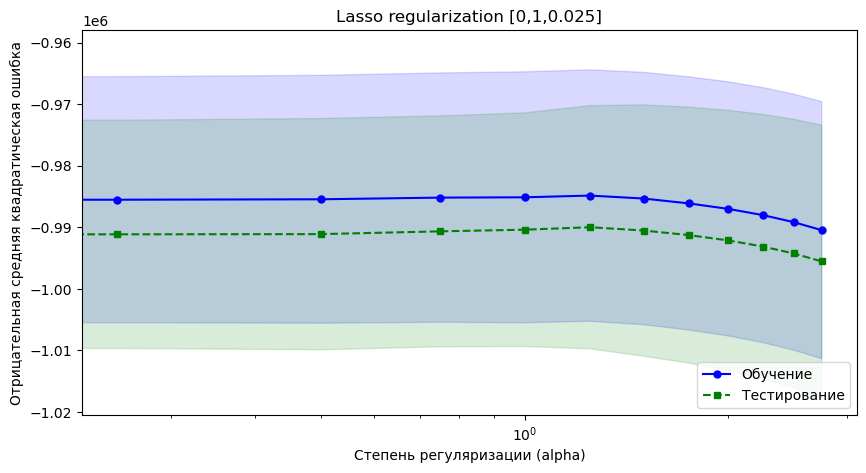

In [126]:
# Lasso

alpha = np.arange(0,3,0.25)
scores_train = []
scores_test = []
for i in alpha:
    lasso = Pipeline([ ('preprocessing', CT) , ('regression', Lasso(alpha=i))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5), scoring = 'neg_mean_squared_error'))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5), scoring = 'neg_mean_squared_error'))
train_mean = np.mean(scores_train, axis=1)
train_std = np.std(scores_train, axis=1)
test_mean = np.mean(scores_test, axis=1)
test_std = np.std(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Lasso regularization [0,1,0.025]')
plt.plot(alpha, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(alpha, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(alpha, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(alpha, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.xscale('log')
plt.xlabel('Степень регуляризации (alpha)')
plt.ylabel('Отрицательная средняя квадратическая ошибка')
plt.legend(loc='lower right')
plt.show()

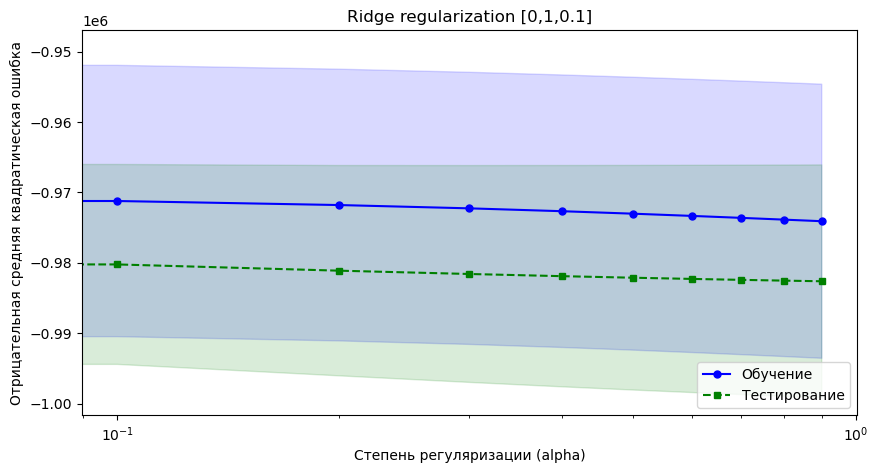

In [127]:
# Ridge

alpha = np.arange(0,1,0.1)
scores_train = []
scores_test = []
for i in alpha:
    ridge = Pipeline([ ('preprocessing', CT) , ('regression', Ridge(alpha=i))])
    scores_train.append(cross_val_score(ridge, X_train, y_train, cv=KFold(5), scoring = 'neg_mean_squared_error'))
    scores_test.append(cross_val_score(ridge, X_test, y_test, cv=KFold(5), scoring = 'neg_mean_squared_error'))
train_mean = np.mean(scores_train, axis=1)
train_std = np.std(scores_train, axis=1)
test_mean = np.mean(scores_test, axis=1)
test_std = np.std(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Ridge regularization [0,1,0.1]')
plt.plot(alpha, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(alpha, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(alpha, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(alpha, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.xscale('log')
plt.xlabel('Степень регуляризации (alpha)')
plt.ylabel('Отрицательная средняя квадратическая ошибка')
plt.legend(loc='lower right')
plt.show()

Для Ridge оптимальным параметром будет alpha = 0.1 . Так как там меньший разброс train_scores и test_scores.

Теперь сделаем кросс-валидацию по нашим моделям, но уже с подобранным гиперпараметрами

In [121]:
reg_list = [KNeighborsRegressor(n_neighbors = 26, p = 4, weights = 'distance'), Lasso(alpha = 0.05), Ridge(alpha = 0.1), LinearRegression()]
cv_list = []
for reg in reg_list:
    pipe = Pipeline([('preprocessing', CT),
                ('regression', reg)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train, y_train, cv=ShuffleSplit(7), scoring = 'neg_mean_absolute_percentage_error')
    cv_list.append(cv_results['test_score'])
cv_list

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.710e+10, tolerance: 1.583e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.702e+10, tolerance: 1.585e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.713e+10, toleranc

[array([-0.08418776, -0.08222653, -0.08432892, -0.08293323, -0.08228247,
        -0.08298715, -0.08280495]),
 array([-0.34233759, -0.3473856 , -0.34348666, -0.34564802, -0.34296242,
        -0.35289455, -0.34230088]),
 array([-0.32854488, -0.33597083, -0.33866306, -0.33460404, -0.32354546,
        -0.34265869, -0.33548282]),
 array([-0.33370208, -0.32767481, -0.34363285, -0.32578957, -0.33369476,
        -0.34662272, -0.33234329])]

In [123]:
cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = [str(i) for i in reg_list]
cv_df

KNeighborsRegressor(n_neighbors=26, p=4, weights='distance')  \
0                                          -0.084188              
1                                          -0.082227              
2                                          -0.084329              
3                                          -0.082933              
4                                          -0.082282              
5                                          -0.082987              
6                                          -0.082805              

   Lasso(alpha=0.05)  Ridge(alpha=0.1)  LinearRegression()  
0          -0.342338         -0.328545           -0.333702  
1          -0.347386         -0.335971           -0.327675  
2          -0.343487         -0.338663           -0.343633  
3          -0.345648         -0.334604           -0.325790  
4          -0.342962         -0.323545           -0.333695  
5          -0.352895         -0.342659           -0.346623  
6          -0.342301         -0.335483           -0.332343

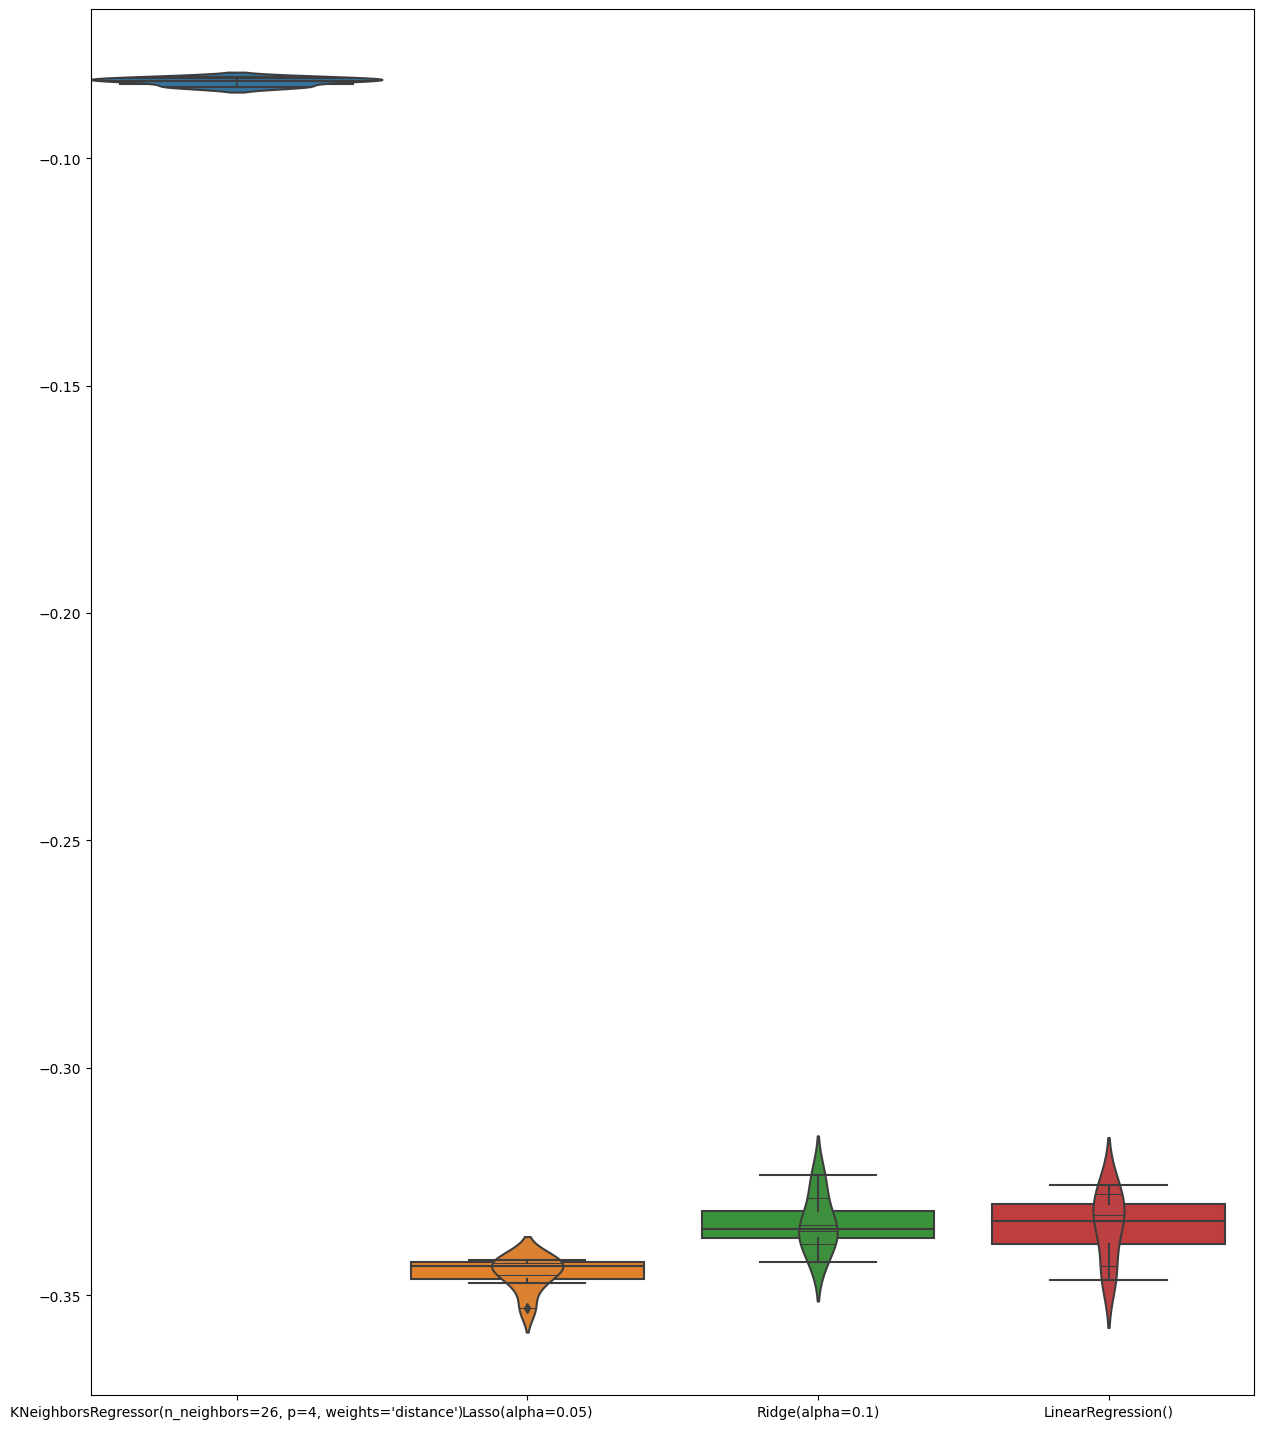

In [124]:
# Изображаем бокплоты в виде самолетов
plt.figure(figsize=(15, 18))
sns.boxplot(data=cv_df)
sns.violinplot(data=cv_df, inner="stick",saturation=0.7, width = 1)
plt.show();

In [125]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', KNeighborsRegressor(n_neighbors = 26, p = 4, weights = 'distance'))])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)
print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_1))

Train: 95.91246494740578
Test: 367589.0041502753


In [108]:
pipe_2 = Pipeline([('preprocessing', CT), ('regression', Lasso(alpha = 0.05))])
pipe_2.fit(X_train, y_train)
y_pred_2 = pipe_2.predict(X_test)
print("Train:",mean_squared_error(y_train, pipe_2.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.235e+10, tolerance: 1.763e+08
  model = cd_fast.enet_coordinate_descent(


Train: 986588.5616259789
Test: 992429.5426948002


In [109]:
pipe_3 = Pipeline([('preprocessing', CT),
                ('regression', Ridge(alpha = 0.1))])
pipe_3.fit(X_train, y_train)
y_pred_3 = pipe_3.predict(X_test)
print("Train:",mean_squared_error(y_train, pipe_3.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_3))

Train: 970659.90076074
Test: 979011.0217593382


In [110]:
pipe_4 = Pipeline([('preprocessing', CT),
                ('regression', LinearRegression())])
pipe_4.fit(X_train, y_train)
y_pred_4 = pipe_4.predict(X_test)
print("Train:",mean_squared_error(y_train, pipe_4.predict(X_train)))
print("Test:",mean_squared_error(y_test, y_pred_4))

Train: 966856.5021983475
Test: 974099.6481563735


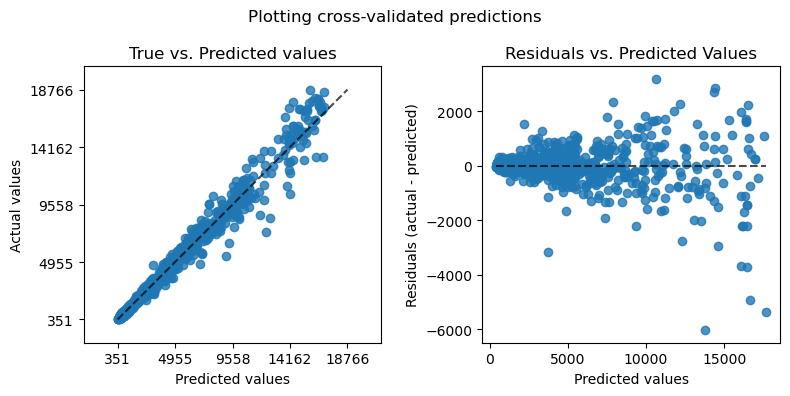

In [128]:

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred_1,
    kind="actual_vs_predicted",
    ax=axs[0],
)
axs[0].set_title("True vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred_1,
    kind="residual_vs_predicted",
    ax=axs[1],
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show();

## RandomForest

In [135]:

rf_1= Pipeline([('preprocessing',CT),('regressor', RandomForestRegressor(n_estimators=200,max_features='sqrt', min_samples_leaf = 4) )]) 
rf_1.fit(X_train, y_train)


y_predict = rf_1.predict(X_test)

display(mean_squared_error(y_predict,y_test)) 

399757.7429112815

In [130]:

pipe_rf = Pipeline([('preprocessing', CT),
                ('regressor', RandomForestRegressor(max_features='sqrt'))])

n_estimators  = np.arange(50,500,50)
min_samples_leaf = [1,2,3,4,5,7,9]
# learning_rate = np.arange(0.01,0.2,0.02)
# subsample= [0.1,0.5,1]

param_grid_rf = [
    {'preprocessing': [CT],
    'regressor': [RandomForestRegressor(max_features='sqrt')],
     'regressor__n_estimators': n_estimators,
     'regressor__min_samples_leaf': min_samples_leaf
    }] 

cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid_rf = GridSearchCV(pipe_rf,param_grid_rf, cv=cross_val, return_train_score = True,
                    n_jobs = -1, scoring = 'neg_mean_squared_error')


grid_rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pol_std',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(max_iter=20,
                                                                                                           missing_values=0)),
                                                                                         ('polynom',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['x',
                                                                          'y',
                                                                          'z...
                                                                                                                       'mapping': FL      10
IF       9
VVS1     8
VVS2     7
VS1      6
VS2      5
SI1      4
SI2      3
I1       2
I2       1
I3       0
dtype: int64}])),
                                                                                             ('scaler',
                                                                                              MinMaxScaler())]),
                                                                             ['clarity'])])],
                          'regressor': [RandomForestRegressor(max_features='sqrt',
                                                              n_estimators=450)],
                          'regressor__min_samples_leaf': [1, 2, 3, 4, 5, 7, 9],
                          'regressor__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [133]:
grid_rf.best_params_

{'preprocessing': ColumnTransformer(remainder='passthrough',
                   transformers=[('pol_std',
                                  Pipeline(steps=[('imputer',
                                                   IterativeImputer(max_iter=20,
                                                                    missing_values=0)),
                                                  ('polynom',
                                                   PolynomialFeatures(include_bias=False)),
                                                  ('scaler', RobustScaler())]),
                                  ['x', 'y', 'z']),
                                 ('num', Normalizer(),
                                  ['carat', 'depth', 'table']),
                                 ('ordinal_map_color',
                                  Pipeline(steps=[('ce',
                                                   OrdinalEncoder(mapping=[...
                                                   OrdinalEncoder(m

In [157]:
grid_rf.best_score_

-399873.47722833714

In [158]:
pd.DataFrame(grid_rf.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

8   \
mean_fit_time                                                             436.503211   
std_fit_time                                                               10.643567   
mean_score_time                                                             8.676151   
std_score_time                                                              1.477994   
param_preprocessing                ColumnTransformer(remainder='passthrough',\n  ...   
param_regressor                    RandomForestRegressor(max_features='sqrt', n_e...   
param_regressor__min_samples_leaf                                                  1   
param_regressor__n_estimators                                                    450   
params                             {'preprocessing': ColumnTransformer(remainder=...   
split0_test_score                                                     -425712.550013   
split1_test_score                                                     -389164.635752   
split2_test_score                                                     -401292.269191   
split3_test_score                                                     -391675.726942   
split4_test_score                                                     -391522.204243   
mean_test_score                                                       -399873.477228   
std_test_score                                                          13574.216803   
rank_test_score                                                                    1   
split0_train_score                                                     -53758.852446   
split1_train_score                                                     -54719.162201   
split2_train_score                                                      -54899.52813   
split3_train_score                                                     -54961.763361   
split4_train_score                                                     -54795.674438   
mean_train_score                                                       -54626.996115   
std_train_score                                                           442.032397   

                                                                                  6   \
mean_fit_time                                                             326.088097   
std_fit_time                                                                7.534299   
mean_score_time                                                             6.787233   
std_score_time                                                              0.924339   
param_preprocessing                ColumnTransformer(remainder='passthrough',\n  ...   
param_regressor                    RandomForestRegressor(max_features='sqrt', n_e...   
param_regressor__min_samples_leaf                                                  1   
param_regressor__n_estimators                                                    350   
params                             {'preprocessing': ColumnTransformer(remainder=...   
split0_test_score                                                     -426246.386986   
split1_test_score                                                     -390339.629703   
split2_test_score                                                     -403500.999476   
split3_test_score                                                     -389800.691547   
split4_test_score                                                     -389991.827395   
mean_test_score                                                       -399975.907021   
std_test_score                                                          14132.509267   
rank_test_score                                                                    2   
split0_train_score                                                     -53848.725347   
split1_train_score                                                     -54948.917221   
split2_train_score                                                     -55166.086053   
split3_train_score               

In [145]:

rf_1= Pipeline([('preprocessing',CT),('regressor', RandomForestRegressor(n_estimators=500,max_features='sqrt', min_samples_leaf = 1) )]) 
rf_1.fit(X_train, y_train)


y_predict = rf_1.predict(X_test)

display(mean_squared_error(y_predict,y_test)) 

391046.89888494846

In [159]:

rf_2= Pipeline([('preprocessing',CT),('regressor', RandomForestRegressor(n_estimators=550,max_features='sqrt', min_samples_leaf = 1) )]) 
rf_2.fit(X_train, y_train)


y_predict2 = rf_2.predict(X_test)

display(mean_squared_error(y_predict2,y_test)) 

389287.0031406435

In [160]:

rf_3= Pipeline([('preprocessing',CT),('regressor', RandomForestRegressor(n_estimators=800,max_features='sqrt', min_samples_leaf = 1) )]) 
rf_3.fit(X_train, y_train)


y_predict3 = rf_3.predict(X_test)

display(mean_squared_error(y_predict3,y_test)) 

388704.55176511983